# CMIP5: Clean-up Precipitation Clusters - 1981 to 2010

The purpose of this notebook is to clean up the precipitation clusters output by a previous notebook

## Imports and Parameters

In [1]:
# this tells Jupyter to embed matplotlib plots in the notebook
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import os
import numpy as np
import pandas as pd
import datetime as dt
import geopandas as gpd
from copy import deepcopy
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import shapely as sp
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
from shapely.geometry import Point
from shapely.geometry import Polygon
import matplotlib.tri as tri
import matplotlib.path as MPath
import geoplot as gplt
from math import sqrt

In [3]:
IN_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
         r'ta\JNotes\Processed\CMIP5\Clustering_1981-2010'

In [4]:
IN_DIR2 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
          r'ta\JNotes\Processed\CMIP5\CMIP5_1981_WetDays'

In [5]:
IN_DIR3 = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Da' \
          r'ta\JNotes\Processed\PRISM\Clustering'

In [6]:
BCCA_START = 169   # starting index for the BCA grid

Load the watershed shapefile for reference

In [7]:
WS_SHP = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\GI' \
         r'S\Shapefiles\UTM14N\Hydrology\Watersheds\Dolan_Creek_Watershed.shp'

In [8]:
DCWS = gpd.read_file( WS_SHP )
UTMCRS = DCWS.crs
UTMCRS

{'init': 'epsg:32614'}

Also load the grid cell centers

In [9]:
LOGPTS = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwat' \
                        r'er\R8937_Stochastic_CC_Recharge\Data\CMIP5\LOCA5_116_GridPts.shp' )
BCGPTS = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwat' \
                        r'er\R8937_Stochastic_CC_Recharge\Data\CMIP5\BCCA5_18_GridPts.shp' )

In [10]:
display( HTML( LOGPTS.head().to_html() ) )

In [11]:
display( HTML( BCGPTS.head().to_html() ) )

In [12]:
def SetGridInd( row, col, NCol, StartInd ):
    """Set the grid index for the on CMIP5 shapefiles. BCCA is at the end 
    of the grid indexes and LOCA is at the beginning
    
    Args:
        row (int): row index, 0-ordered
        col (int): col index, 0-ordered
        NCol (int): the number of columns in BCCA
        StartInd (int): the starting index
    """
    CurInd = (row * NCol) + col
    return int( StartInd + CurInd )

In [13]:
LOGPTS['Grid_Id'] = LOGPTS.apply( lambda row: SetGridInd( row['Row'], row['Col'], 14, 1),
                                      axis=1 )
BCGPTS['Grid_Id'] = BCGPTS.apply( lambda row: SetGridInd( row['Row'], row['Col'], 7, BCCA_START),
                                      axis=1 )

In [14]:
LOGPTS.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
LOGPTS.sort_index( axis=0, ascending=True, inplace=True )
BCGPTS.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
BCGPTS.sort_index( axis=0, ascending=True, inplace=True )

In [15]:
display( HTML( LOGPTS.head().to_html() ) )

In [16]:
display( HTML( BCGPTS.head().to_html() ) )

Read in the shapefiles which were saved out with the cluster configuration. We only want the clusters from the PCA analysis with the number of clusters equal to 4.

In [17]:
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Jan_ClusterPCA.shp") )
gpdLOJanCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Jan_ClusterPCA.shp") )
gpdBCJanCluster = gpd.read_file( OutFName )

In [18]:
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Feb_ClusterPCA.shp") )
gpdLOFebCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Feb_ClusterPCA.shp") )
gpdBCFebCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Mar_ClusterPCA.shp") )
gpdLOMarCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Mar_ClusterPCA.shp") )
gpdBCMarCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Apr_ClusterPCA.shp") )
gpdLOAprCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Apr_ClusterPCA.shp") )
gpdBCAprCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_May_ClusterPCA.shp") )
gpdLOMayCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_May_ClusterPCA.shp") )
gpdBCMayCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Jun_ClusterPCA.shp") )
gpdLOJunCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Jun_ClusterPCA.shp") )
gpdBCJunCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Jul_ClusterPCA.shp") )
gpdLOJulCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Jul_ClusterPCA.shp") )
gpdBCJulCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Aug_ClusterPCA.shp") )
gpdLOAugCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Aug_ClusterPCA.shp") )
gpdBCAugCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Sep_ClusterPCA.shp") )
gpdLOSepCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Sep_ClusterPCA.shp") )
gpdBCSepCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Oct_ClusterPCA.shp") )
gpdLOOctCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Oct_ClusterPCA.shp") )
gpdBCOctCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Nov_ClusterPCA.shp") )
gpdLONovCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Nov_ClusterPCA.shp") )
gpdBCNovCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "LOCA_Dec_ClusterPCA.shp") )
gpdLODecCluster = gpd.read_file( OutFName )
OutFName = os.path.normpath( os.path.join( IN_DIR, "BCCA_Dec_ClusterPCA.shp") )
gpdBCDecCluster = gpd.read_file( OutFName )

Also read in the polygons for PRISM regionalization

In [19]:
PRregJan = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\JanRegionPolys.shp' )
PRregFeb = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\FebRegionPolys.shp' )
PRregMar = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\MarRegionPolys.shp' )
PRregApr = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\AprRegionPolys.shp' )
PRregMay = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\MayRegionPolys.shp' )
PRregJun = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\JunRegionPolys.shp' )
PRregJul = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\JulRegionPolys.shp' )
PRregAug = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\AugRegionPolys.shp' )
PRregSep = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\SepRegionPolys.shp' )
PRregOct = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\OctRegionPolys.shp' )
PRregNov = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\NovRegionPolys.shp' )
PRregDec = gpd.read_file( r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stoch' \
                          r'astic_CC_Recharge\Data\JNotes\Processed\PRISM\Clustering\DecRegionPolys.shp' )

Trim the GeoDataFrames down to be only the columns that we need

In [20]:
KeepCols = ['K-Means_4', 'geometry']

In [21]:
gpdLOJanCluster = gpdLOJanCluster[KeepCols].copy()
gpdBCJanCluster = gpdBCJanCluster[KeepCols].copy()

In [22]:
gpdLOFebCluster = gpdLOFebCluster[KeepCols].copy()
gpdLOMarCluster = gpdLOMarCluster[KeepCols].copy()
gpdLOAprCluster = gpdLOAprCluster[KeepCols].copy()
gpdLOMayCluster = gpdLOMayCluster[KeepCols].copy()
gpdLOJunCluster = gpdLOJunCluster[KeepCols].copy()
gpdLOJulCluster = gpdLOJulCluster[KeepCols].copy()
gpdLOAugCluster = gpdLOAugCluster[KeepCols].copy()
gpdLOSepCluster = gpdLOSepCluster[KeepCols].copy()
gpdLOOctCluster = gpdLOOctCluster[KeepCols].copy()
gpdLONovCluster = gpdLONovCluster[KeepCols].copy()
gpdLODecCluster = gpdLODecCluster[KeepCols].copy()

In [23]:
gpdBCFebCluster = gpdBCFebCluster[KeepCols].copy()
gpdBCMarCluster = gpdBCMarCluster[KeepCols].copy()
gpdBCAprCluster = gpdBCAprCluster[KeepCols].copy()
gpdBCMayCluster = gpdBCMayCluster[KeepCols].copy()
gpdBCJunCluster = gpdBCJunCluster[KeepCols].copy()
gpdBCJulCluster = gpdBCJulCluster[KeepCols].copy()
gpdBCAugCluster = gpdBCAugCluster[KeepCols].copy()
gpdBCSepCluster = gpdBCSepCluster[KeepCols].copy()
gpdBCOctCluster = gpdBCOctCluster[KeepCols].copy()
gpdBCNovCluster = gpdBCNovCluster[KeepCols].copy()
gpdBCDecCluster = gpdBCDecCluster[KeepCols].copy()

## Manual, Interactive Cluster Smoothing

Manually smooth and reorganize these clusters to be spatially coherent.

### January

Copy the current cluster identification/delineation which was done with K-means to a new column. The column will be used to provide smoothed cluster values. Also change to be spatially consistent cluster numbering.

In [24]:
NColN = "Region_Id"
NamCoord = "coords"

In [25]:
AClustNums = [ 1, #0 East to northeast
               2, #1 southeast to southwest
               3, #2 west and/or center
               4, #3 west to northwest
              ]

In [26]:
gpdLOJanCluster[NColN] = gpdLOJanCluster[KeepCols[0]]
gpdLOJanCluster[NamCoord] = gpdLOJanCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [27]:
gpdLOJanCluster['Grid_Id'] = gpdLOJanCluster.index + 1

In [28]:
gpdLOJanCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOJanCluster.sort_index( axis=0, ascending=True, inplace=True )

In [29]:
display( HTML( gpdLOJanCluster.head().to_html() ) )

In [30]:
gpdBCJanCluster[NColN] = gpdBCJanCluster[KeepCols[0]]
gpdBCJanCluster[NamCoord] = gpdBCJanCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [31]:
gpdBCJanCluster['Grid_Id'] = gpdBCJanCluster.index + BCCA_START

In [32]:
gpdBCJanCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCJanCluster.sort_index( axis=0, ascending=True, inplace=True )

In [33]:
display( HTML( gpdBCJanCluster.head().to_html() ) )

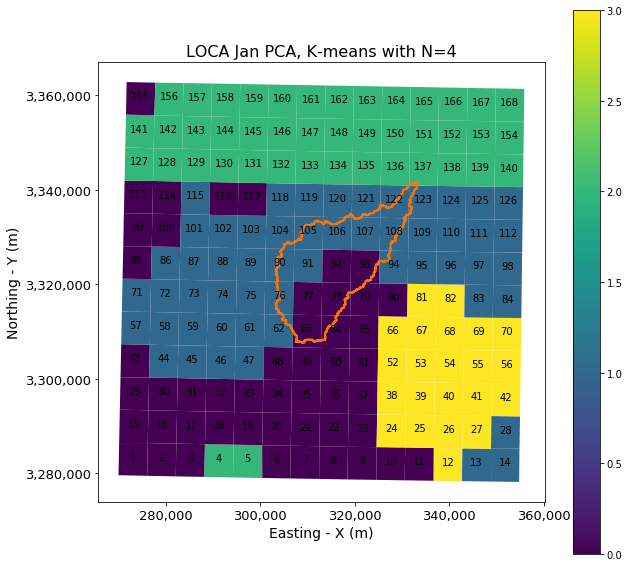

In [34]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJanCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

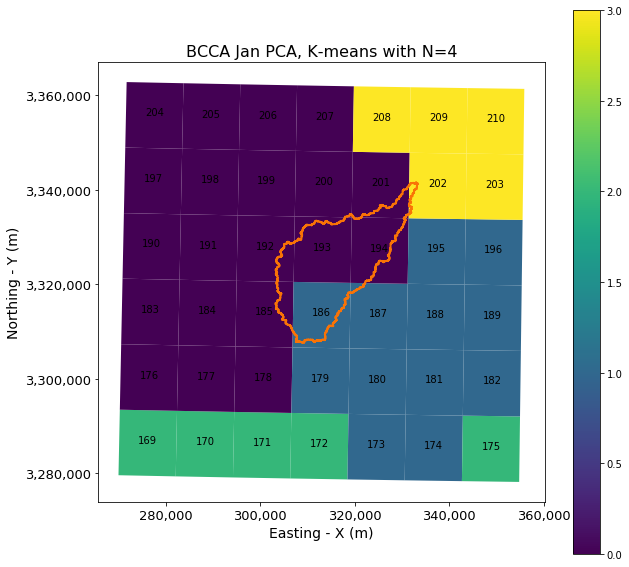

In [35]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJanCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [36]:
LOMapDict = { 1 : 1,
              3 : 2,
              0 : 3,
              2 : 4 }
BCMapDict = { 3 : 1,
              1 : 2,
              2 : 3,
              0 : 4
}

In [37]:
LOReplLam = lambda oCol: LOMapDict[oCol]
BCReplLam = lambda oCol: BCMapDict[oCol]

In [38]:
gpdLOJanCluster[NColN] = gpdLOJanCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCJanCluster[NColN] = gpdBCJanCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

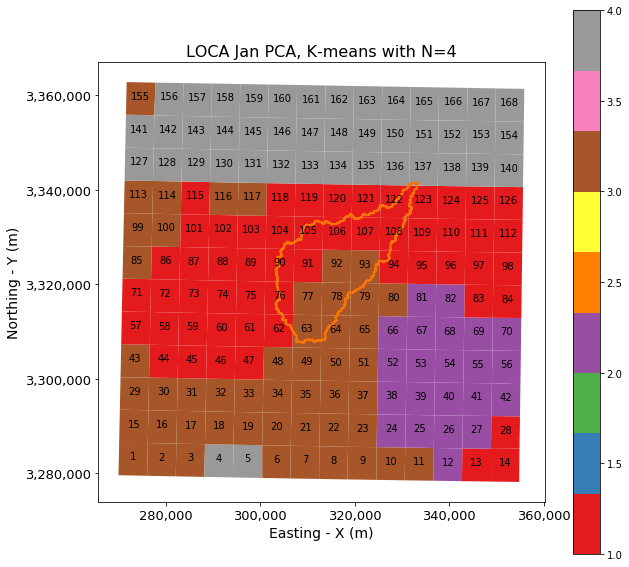

In [39]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJanCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [40]:
gpdLOJanCluster.at[155, NColN] = 4
gpdLOJanCluster.at[116, NColN] = 4
gpdLOJanCluster.at[117, NColN] = 4
gpdLOJanCluster.at[114, NColN] = 4
gpdLOJanCluster.at[113, NColN] = 4
gpdLOJanCluster.at[99, NColN] = 4
gpdLOJanCluster.at[100, NColN] = 4
gpdLOJanCluster.at[85, NColN] = 4
gpdLOJanCluster.at[166, NColN] = 1
gpdLOJanCluster.at[167, NColN] = 1
gpdLOJanCluster.at[168, NColN] = 1
gpdLOJanCluster.at[152, NColN] = 1
gpdLOJanCluster.at[153, NColN] = 1
gpdLOJanCluster.at[154, NColN] = 1
gpdLOJanCluster.at[138, NColN] = 1
gpdLOJanCluster.at[139, NColN] = 1
gpdLOJanCluster.at[140, NColN] = 1
gpdLOJanCluster.at[137, NColN] = 1
gpdLOJanCluster.at[136, NColN] = 1
gpdLOJanCluster.at[28, NColN] = 2
gpdLOJanCluster.at[13, NColN] = 2
gpdLOJanCluster.at[14, NColN] = 2
gpdLOJanCluster.at[4, NColN] = 3
gpdLOJanCluster.at[5, NColN] = 3
gpdLOJanCluster.at[71, NColN] = 3
gpdLOJanCluster.at[57, NColN] = 3

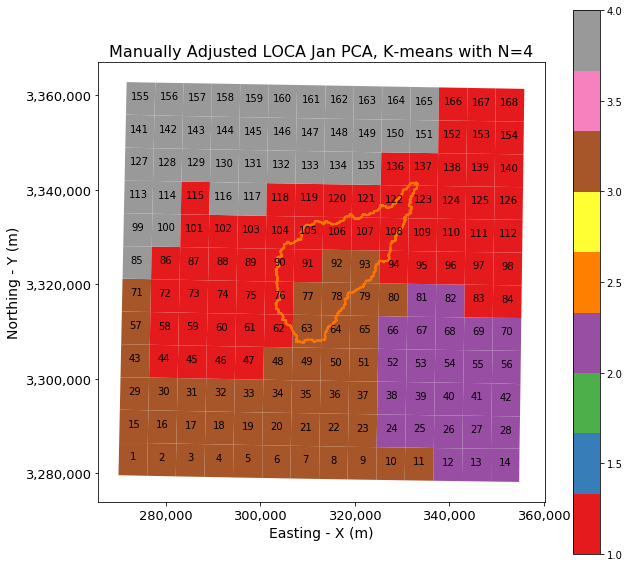

In [41]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJanCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

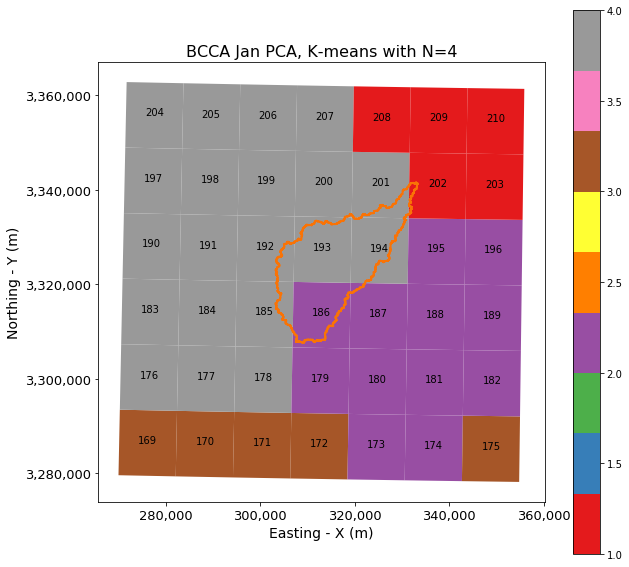

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJanCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [43]:
gpdBCJanCluster.at[175, NColN] = 2

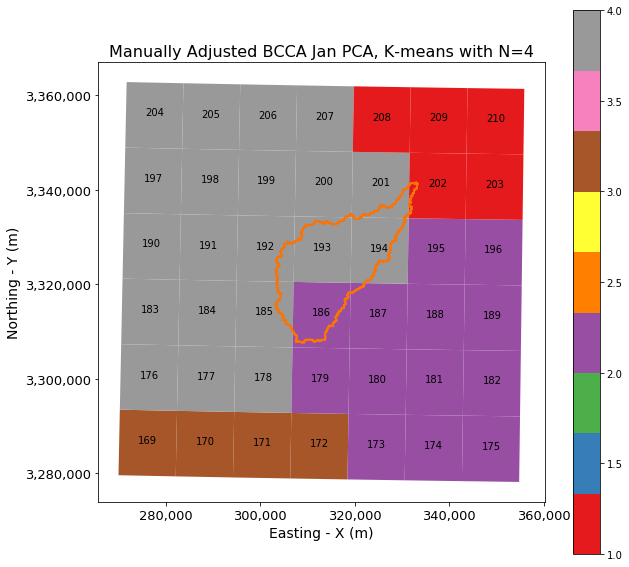

In [44]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJanCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Jan PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [45]:
PtsMergeCols = ['Row', 'Col', 'geometry']
MonthMergeCols = ['K-Means_4', 'Region_Id']

In [46]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOJanMergeDF = gpdLOJanCluster[MonthMergeCols].copy()

In [47]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCJanMergeDF = gpdBCJanCluster[MonthMergeCols].copy()

In [48]:
JanLOCompP = LOPtsMergeDF.merge( LOJanMergeDF, left_index=True, right_index=True )
JanBCCompP = BCPtsMergeDF.merge( BCJanMergeDF, left_index=True, right_index=True )

In [49]:
JanLOCompP.crs = UTMCRS
JanBCCompP.crs = UTMCRS

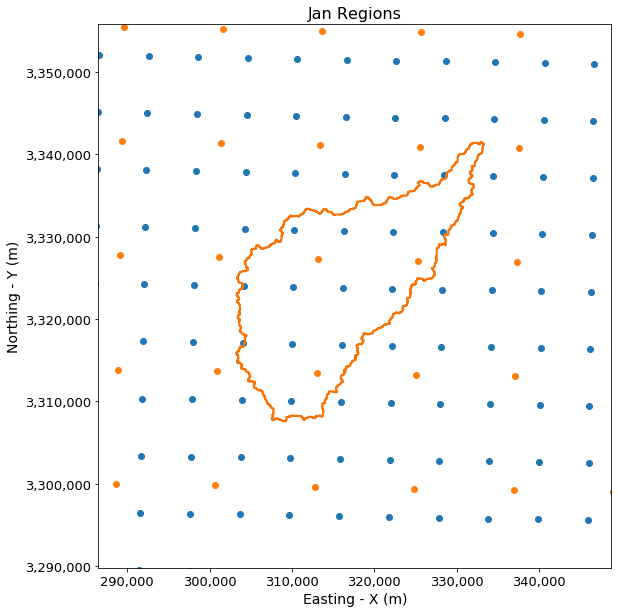

In [50]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
JanLOCompP.plot( ax=ax11 )
JanBCCompP.plot( ax=ax11 )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jan Regions", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [51]:
PRregJan.drop( columns='Id', inplace=True )
PRregJan['PRegion_Id'] = PRregJan['Region_Id']
PRregJan.set_index( keys="Region_Id", inplace=True )

In [52]:
JanLOCompP["PRegion_Id"] = 5

In [53]:
JanLOCompP["Intersects"] = JanLOCompP.intersects( PRregJan.loc[1, 'geometry'] )
JanLOCompP.at[JanLOCompP["Intersects"], "PRegion_Id"] = 1
JanLOCompP["Intersects"] = JanLOCompP.intersects( PRregJan.loc[2, 'geometry'] )
JanLOCompP.at[JanLOCompP["Intersects"], "PRegion_Id"] = 2
JanLOCompP["Intersects"] = JanLOCompP.intersects( PRregJan.loc[3, 'geometry'] )
JanLOCompP.at[JanLOCompP["Intersects"], "PRegion_Id"] = 3
JanLOCompP["Intersects"] = JanLOCompP.intersects( PRregJan.loc[4, 'geometry'] )
JanLOCompP.at[JanLOCompP["Intersects"], "PRegion_Id"] = 4

In [54]:
JanLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.226190    2.363095    3.553571
std      3.462373    4.04318    1.013102    1.185873    1.603734
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    0.000000    1.000000    2.000000
50%      5.500000    6.50000    1.000000    2.000000    4.000000
75%      8.250000   10.00000    2.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [55]:
JanBCCompP["PRegion_Id"] = 5

In [56]:
JanBCCompP["Intersects"] = JanBCCompP.intersects( PRregJan.loc[1, 'geometry'] )
JanBCCompP.at[JanBCCompP["Intersects"], "PRegion_Id"] = 1
JanBCCompP["Intersects"] = JanBCCompP.intersects( PRregJan.loc[2, 'geometry'] )
JanBCCompP.at[JanBCCompP["Intersects"], "PRegion_Id"] = 2
JanBCCompP["Intersects"] = JanBCCompP.intersects( PRregJan.loc[3, 'geometry'] )
JanBCCompP.at[JanBCCompP["Intersects"], "PRegion_Id"] = 3
JanBCCompP["Intersects"] = JanBCCompP.intersects( PRregJan.loc[4, 'geometry'] )
JanBCCompP.at[JanBCCompP["Intersects"], "PRegion_Id"] = 4

In [57]:
JanBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   0.880952   2.928571    4.047619
std     1.728527   2.024243   1.040694   1.134661    1.413392
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   0.000000   2.000000    3.000000
50%     2.500000   3.000000   1.000000   3.000000    5.000000
75%     4.000000   5.000000   1.000000   4.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

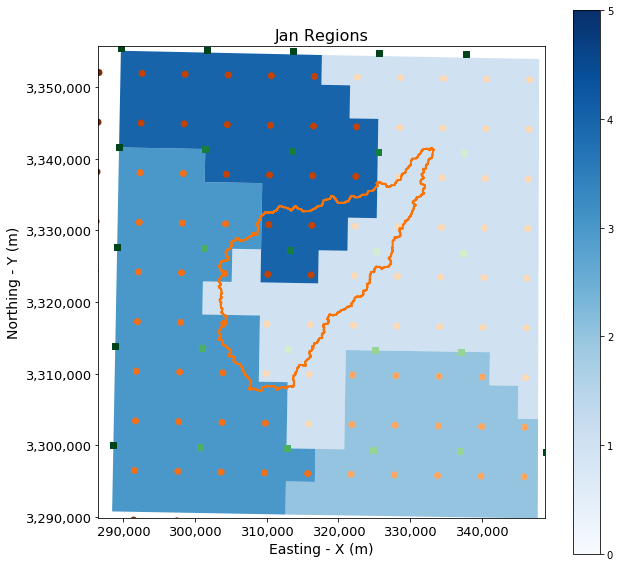

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
PRregJan.plot(column='PRegion_Id', ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
JanLOCompP.plot(column='PRegion_Id', ax=ax11, cmap='Oranges', vmin=0.0, vmax=5.0, marker='o' )
JanBCCompP.plot(column='PRegion_Id', ax=ax11, cmap='Greens', vmin=0.0, vmax=5.0, marker='s' )
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_xlim( ( 286500, 348800 ) )
ax11.set_ylim( ( 3289800, 3355800 ) )
ax11.set_title("Jan Regions", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [59]:
display( HTML( gpdLOJanCluster.head().to_html() ) )

In [60]:
display( HTML( JanLOCompP.head().to_html() ) )

In [61]:
gpdLOJanCluster.index == JanLOCompP.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [62]:
gpdLOJanCluster["PRegion_Id"] = np.array( JanLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCJanCluster["PRegion_Id"] = np.array( JanBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

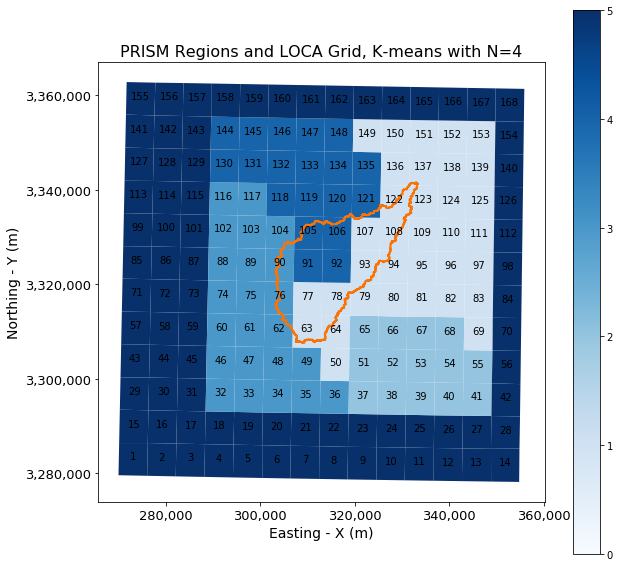

In [63]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJanCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

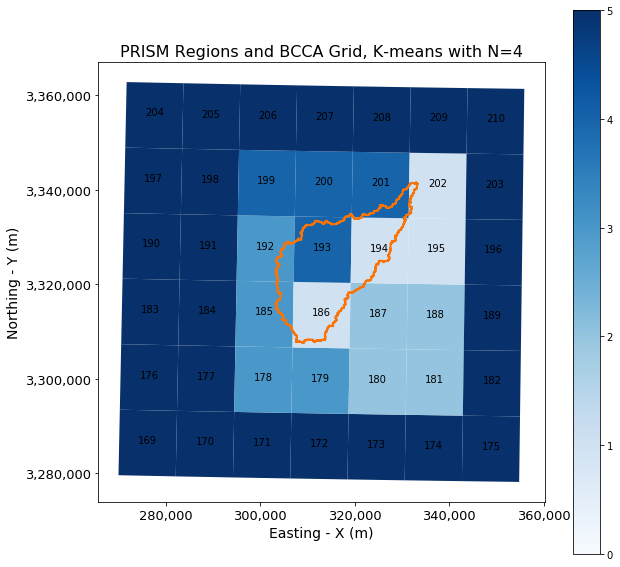

In [64]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJanCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCJanCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Feb

In [65]:
gpdLOFebCluster[NColN] = gpdLOFebCluster[KeepCols[0]]
gpdLOFebCluster[NamCoord] = gpdLOFebCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [66]:
gpdLOFebCluster['Grid_Id'] = gpdLOFebCluster.index + 1

In [67]:
gpdLOFebCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOFebCluster.sort_index( axis=0, ascending=True, inplace=True )

In [68]:
display( HTML( gpdLOFebCluster.head().to_html() ) )

In [69]:
gpdBCFebCluster[NColN] = gpdBCFebCluster[KeepCols[0]]
gpdBCFebCluster[NamCoord] = gpdBCFebCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [70]:
gpdBCFebCluster['Grid_Id'] = gpdBCFebCluster.index + BCCA_START

In [71]:
gpdBCFebCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCFebCluster.sort_index( axis=0, ascending=True, inplace=True )

In [72]:
display( HTML( gpdBCFebCluster.head().to_html() ) )

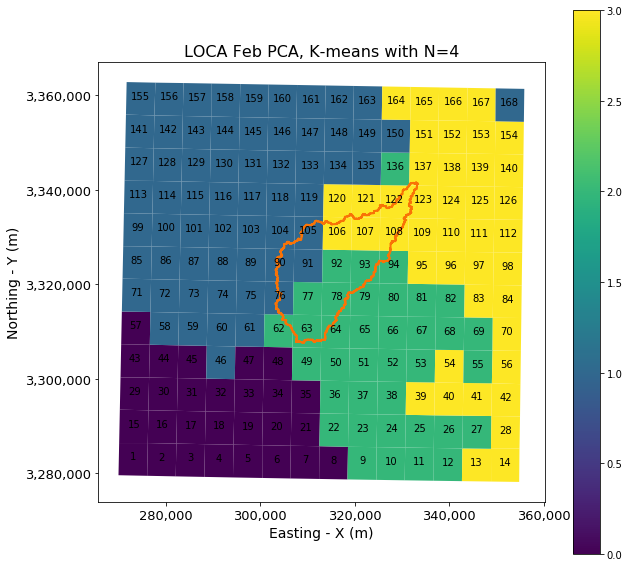

In [73]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOFebCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

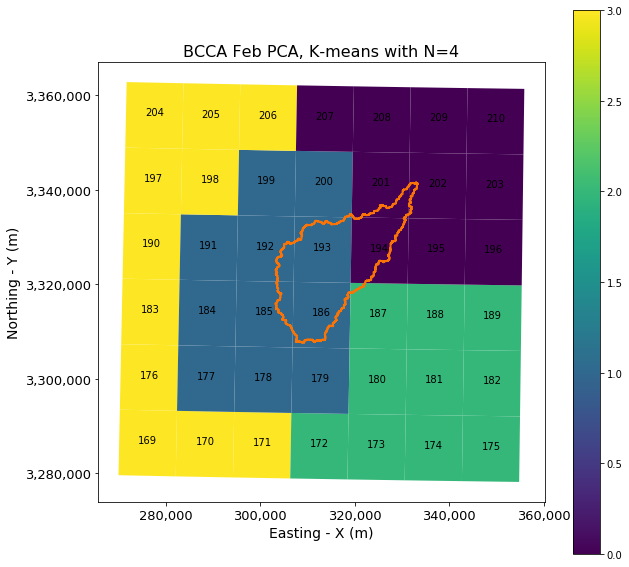

In [74]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCFebCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [75]:
LOMapDict = { 3 : 1,
              2 : 2,
              0 : 3,
              1 : 4 }
BCMapDict = { 0 : 1,
              2 : 2,
              1 : 3,
              3 : 4
}

In [76]:
gpdLOFebCluster[NColN] = gpdLOFebCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCFebCluster[NColN] = gpdBCFebCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

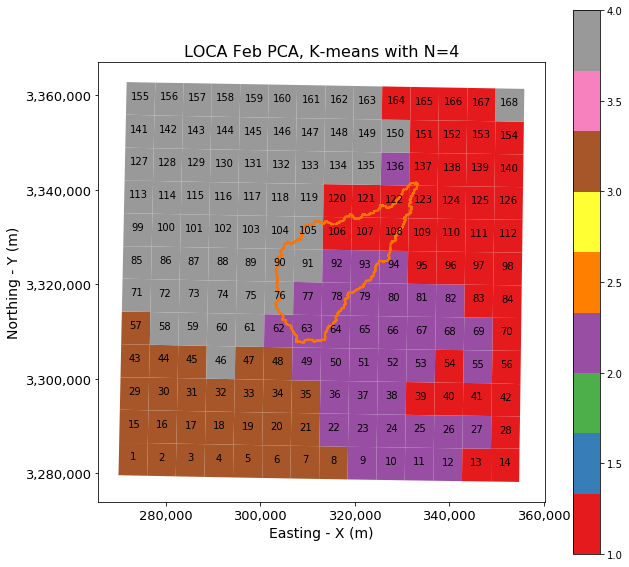

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOFebCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [78]:
gpdLOFebCluster.at[168, NColN] = 1
gpdLOFebCluster.at[136, NColN] = 1
gpdLOFebCluster.at[70, NColN] = 2
gpdLOFebCluster.at[56, NColN] = 2
gpdLOFebCluster.at[54, NColN] = 2
gpdLOFebCluster.at[39, NColN] = 2
gpdLOFebCluster.at[40, NColN] = 2
gpdLOFebCluster.at[41, NColN] = 2
gpdLOFebCluster.at[42, NColN] = 2
gpdLOFebCluster.at[28, NColN] = 2
gpdLOFebCluster.at[13, NColN] = 2
gpdLOFebCluster.at[14, NColN] = 2

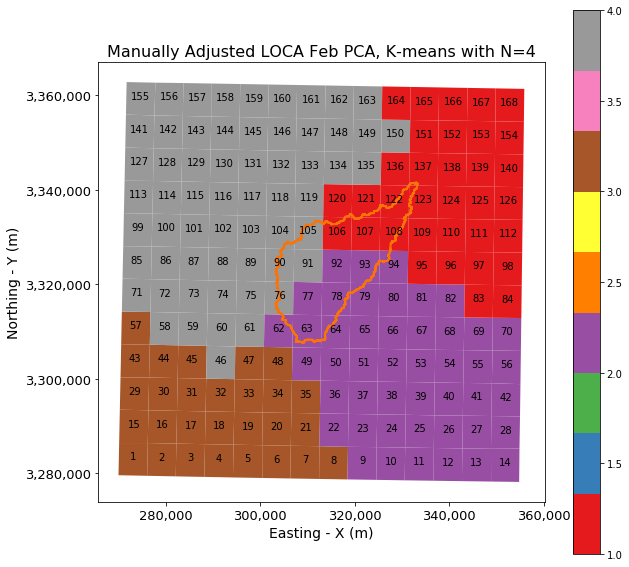

In [79]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOFebCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

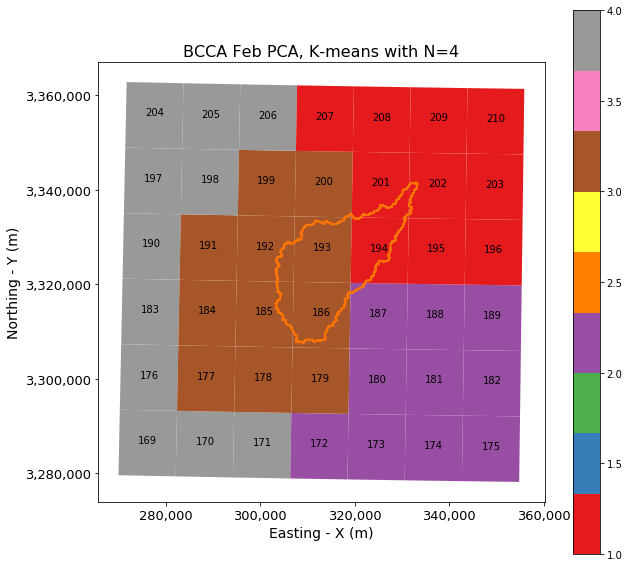

In [80]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCFebCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [81]:
#gpdBCFebCluster.at[175, NColN] = 2

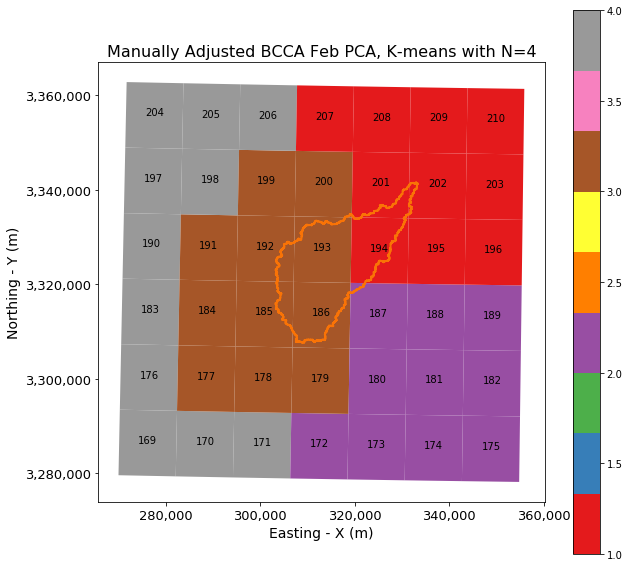

In [82]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCFebCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Feb PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [83]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOFebMergeDF = gpdLOFebCluster[MonthMergeCols].copy()

In [84]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCFebMergeDF = gpdBCFebCluster[MonthMergeCols].copy()

In [85]:
FebLOCompP = LOPtsMergeDF.merge( LOFebMergeDF, left_index=True, right_index=True )
FebBCCompP = BCPtsMergeDF.merge( BCFebMergeDF, left_index=True, right_index=True )

In [86]:
FebLOCompP.crs = UTMCRS
FebBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [87]:
PRregFeb.drop( columns='Id', inplace=True )
PRregFeb['PRegion_Id'] = PRregFeb['Region_Id']
PRregFeb.set_index( keys="Region_Id", inplace=True )

In [88]:
FebLOCompP["PRegion_Id"] = 5

In [89]:
FebLOCompP["Intersects"] = FebLOCompP.intersects( PRregFeb.loc[1, 'geometry'] )
FebLOCompP.at[FebLOCompP["Intersects"], "PRegion_Id"] = 1
FebLOCompP["Intersects"] = FebLOCompP.intersects( PRregFeb.loc[2, 'geometry'] )
FebLOCompP.at[FebLOCompP["Intersects"], "PRegion_Id"] = 2
FebLOCompP["Intersects"] = FebLOCompP.intersects( PRregFeb.loc[3, 'geometry'] )
FebLOCompP.at[FebLOCompP["Intersects"], "PRegion_Id"] = 3
FebLOCompP["Intersects"] = FebLOCompP.intersects( PRregFeb.loc[4, 'geometry'] )
FebLOCompP.at[FebLOCompP["Intersects"], "PRegion_Id"] = 4

In [90]:
FebLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.553571    2.678571    3.458333
std      3.462373    4.04318    1.042561    1.159813    1.607818
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    2.000000    2.000000
50%      5.500000    6.50000    1.000000    3.000000    3.000000
75%      8.250000   10.00000    2.250000    4.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [91]:
FebBCCompP["PRegion_Id"] = 5

In [92]:
FebBCCompP["Intersects"] = FebBCCompP.intersects( PRregFeb.loc[1, 'geometry'] )
FebBCCompP.at[FebBCCompP["Intersects"], "PRegion_Id"] = 1
FebBCCompP["Intersects"] = FebBCCompP.intersects( PRregFeb.loc[2, 'geometry'] )
FebBCCompP.at[FebBCCompP["Intersects"], "PRegion_Id"] = 2
FebBCCompP["Intersects"] = FebBCCompP.intersects( PRregFeb.loc[3, 'geometry'] )
FebBCCompP.at[FebBCCompP["Intersects"], "PRegion_Id"] = 3
FebBCCompP["Intersects"] = FebBCCompP.intersects( PRregFeb.loc[4, 'geometry'] )
FebBCCompP.at[FebBCCompP["Intersects"], "PRegion_Id"] = 4

In [93]:
FebBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000   42.00000  42.000000   42.000000
mean    2.500000   3.000000    1.52381   2.547619    4.047619
std     1.728527   2.024243    1.13133   1.130560    1.396029
min     0.000000   0.000000    0.00000   1.000000    1.000000
25%     1.000000   1.000000    1.00000   2.000000    3.000000
50%     2.500000   3.000000    1.50000   3.000000    5.000000
75%     4.000000   5.000000    2.75000   3.750000    5.000000
max     5.000000   6.000000    3.00000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [94]:
gpdLOFebCluster["PRegion_Id"] = np.array( FebLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCFebCluster["PRegion_Id"] = np.array( FebBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

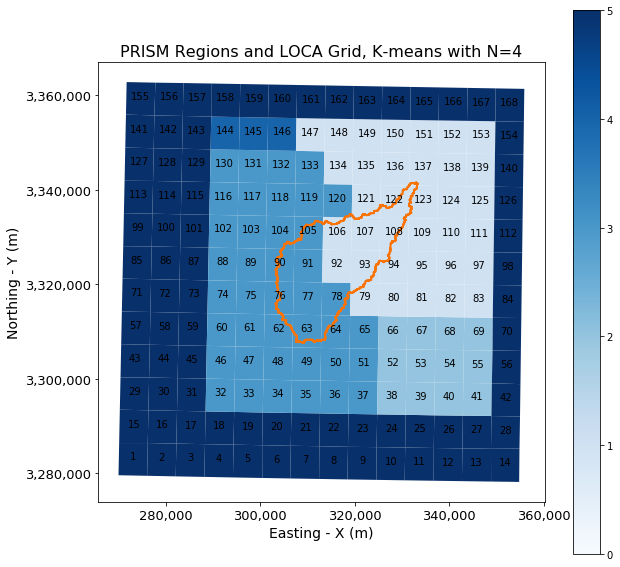

In [95]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOFebCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

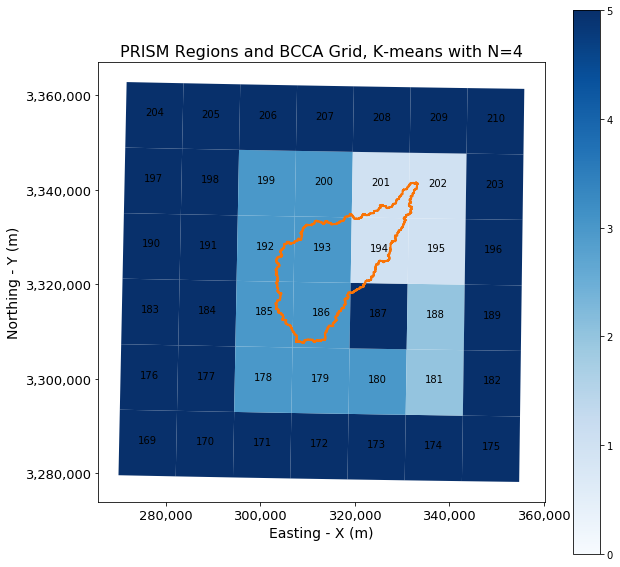

In [96]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCFebCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCFebCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

In [97]:
gpdLOMarCluster[NColN] = gpdLOMarCluster[KeepCols[0]]
gpdLOMarCluster[NamCoord] = gpdLOMarCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [98]:
gpdLOMarCluster['Grid_Id'] = gpdLOMarCluster.index + 1

In [99]:
gpdLOMarCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOMarCluster.sort_index( axis=0, ascending=True, inplace=True )

In [100]:
display( HTML( gpdLOMarCluster.head().to_html() ) )

In [101]:
gpdBCMarCluster[NColN] = gpdBCMarCluster[KeepCols[0]]
gpdBCMarCluster[NamCoord] = gpdBCMarCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [102]:
gpdBCMarCluster['Grid_Id'] = gpdBCMarCluster.index + BCCA_START

In [103]:
gpdBCMarCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCMarCluster.sort_index( axis=0, ascending=True, inplace=True )

In [104]:
display( HTML( gpdBCMarCluster.head().to_html() ) )

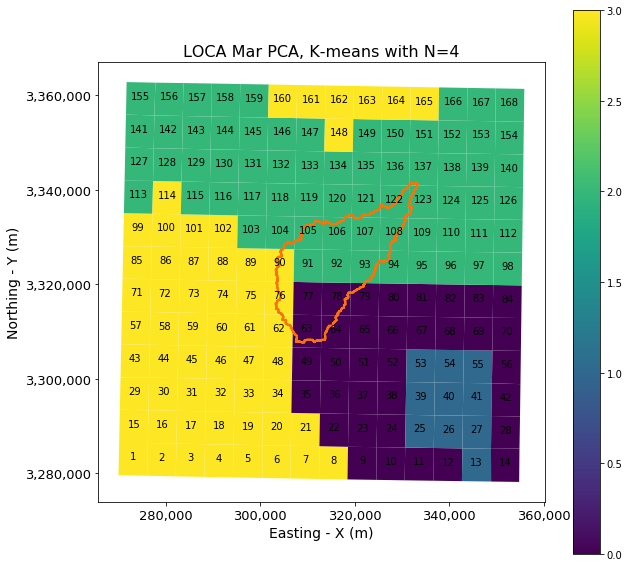

In [105]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMarCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

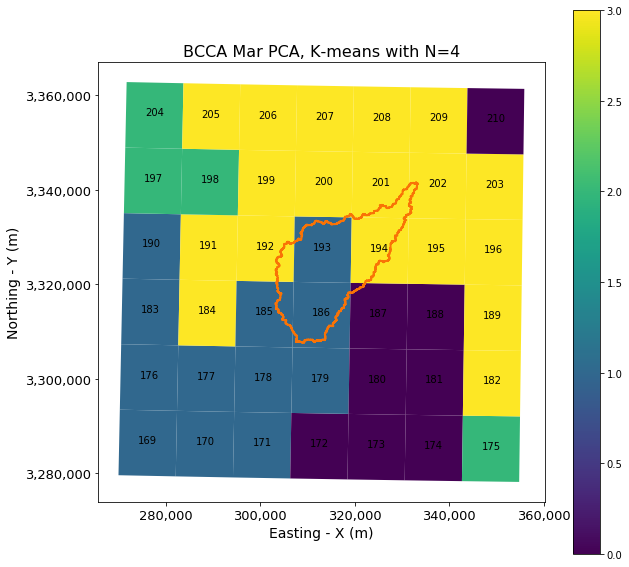

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMarCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [107]:
LOMapDict = { 2 : 1,
              1 : 2,
              0 : 3,
              3 : 4 }
BCMapDict = { 3 : 1,
              0 : 2,
              1 : 3,
              2 : 4
}

In [108]:
gpdLOMarCluster[NColN] = gpdLOMarCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCMarCluster[NColN] = gpdBCMarCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

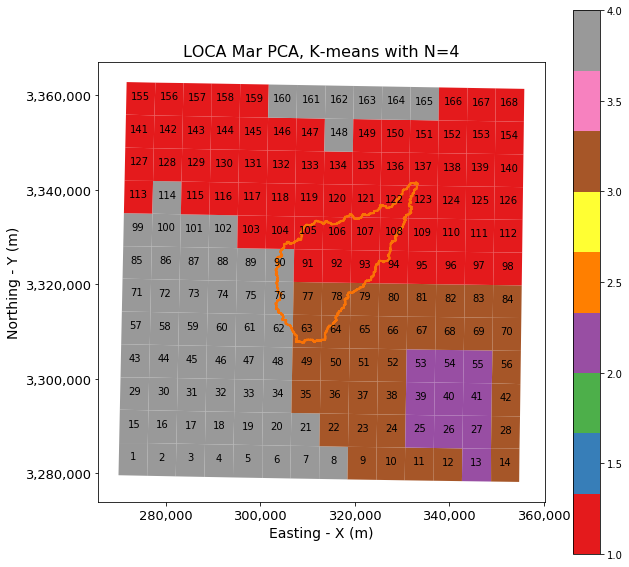

In [109]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMarCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [110]:
gpdLOMarCluster.at[160, NColN] = 1
gpdLOMarCluster.at[161, NColN] = 1
gpdLOMarCluster.at[162, NColN] = 1
gpdLOMarCluster.at[163, NColN] = 1
gpdLOMarCluster.at[164, NColN] = 1
gpdLOMarCluster.at[165, NColN] = 1
gpdLOMarCluster.at[148, NColN] = 1
gpdLOMarCluster.at[56, NColN] = 2
gpdLOMarCluster.at[42, NColN] = 2
gpdLOMarCluster.at[28, NColN] = 2
gpdLOMarCluster.at[14, NColN] = 2
gpdLOMarCluster.at[12, NColN] = 2
gpdLOMarCluster.at[11, NColN] = 2

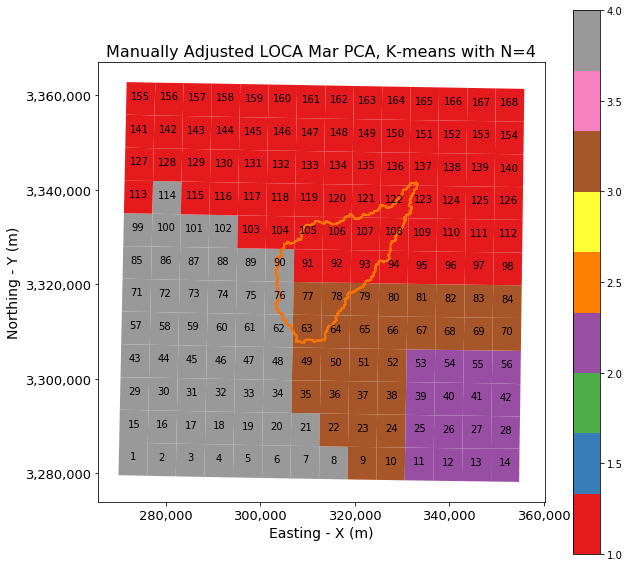

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMarCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

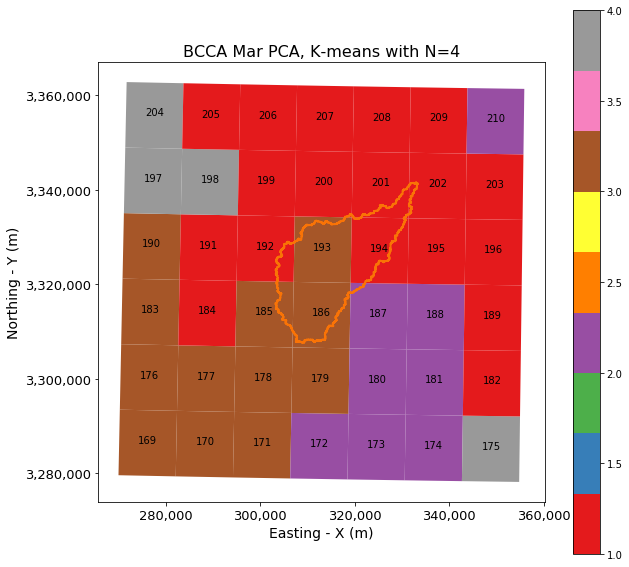

In [112]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMarCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [113]:
gpdBCMarCluster.at[210, NColN] = 1
gpdBCMarCluster.at[175, NColN] = 2

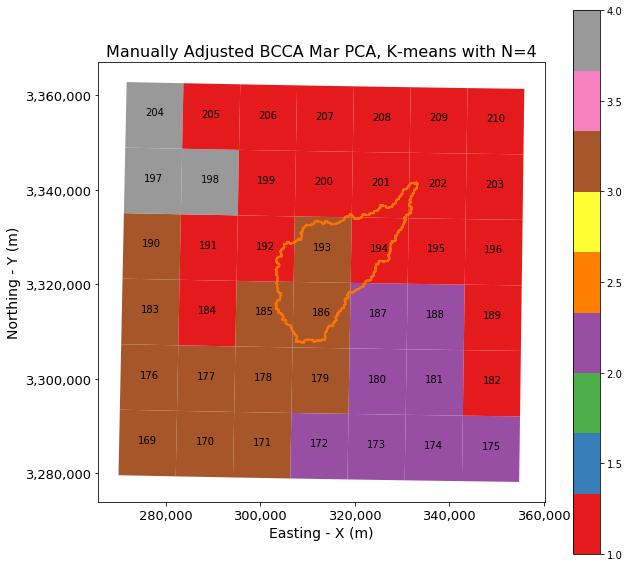

In [114]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMarCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Mar PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [115]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOMarMergeDF = gpdLOMarCluster[MonthMergeCols].copy()

In [116]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCMarMergeDF = gpdBCMarCluster[MonthMergeCols].copy()

In [117]:
MarLOCompP = LOPtsMergeDF.merge( LOMarMergeDF, left_index=True, right_index=True )
MarBCCompP = BCPtsMergeDF.merge( BCMarMergeDF, left_index=True, right_index=True )

In [118]:
MarLOCompP.crs = UTMCRS
MarBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [119]:
PRregMar.drop( columns='Id', inplace=True )
PRregMar['PRegion_Id'] = PRregMar['Region_Id']
PRregMar.set_index( keys="Region_Id", inplace=True )

In [120]:
MarLOCompP["PRegion_Id"] = 5

In [121]:
MarLOCompP["Intersects"] = MarLOCompP.intersects( PRregMar.loc[1, 'geometry'] )
MarLOCompP.at[MarLOCompP["Intersects"], "PRegion_Id"] = 1
MarLOCompP["Intersects"] = MarLOCompP.intersects( PRregMar.loc[2, 'geometry'] )
MarLOCompP.at[MarLOCompP["Intersects"], "PRegion_Id"] = 2
MarLOCompP["Intersects"] = MarLOCompP.intersects( PRregMar.loc[3, 'geometry'] )
MarLOCompP.at[MarLOCompP["Intersects"], "PRegion_Id"] = 3
MarLOCompP["Intersects"] = MarLOCompP.intersects( PRregMar.loc[4, 'geometry'] )
MarLOCompP.at[MarLOCompP["Intersects"], "PRegion_Id"] = 4

In [122]:
MarLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.863095    2.333333    3.541667
std      3.462373    4.04318    1.104837    1.302539    1.655527
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    1.000000    2.000000
50%      5.500000    6.50000    2.000000    2.000000    4.000000
75%      8.250000   10.00000    3.000000    4.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [123]:
MarBCCompP["PRegion_Id"] = 5

In [124]:
MarBCCompP["Intersects"] = MarBCCompP.intersects( PRregMar.loc[1, 'geometry'] )
MarBCCompP.at[MarBCCompP["Intersects"], "PRegion_Id"] = 1
MarBCCompP["Intersects"] = MarBCCompP.intersects( PRregMar.loc[2, 'geometry'] )
MarBCCompP.at[MarBCCompP["Intersects"], "PRegion_Id"] = 2
MarBCCompP["Intersects"] = MarBCCompP.intersects( PRregMar.loc[3, 'geometry'] )
MarBCCompP.at[MarBCCompP["Intersects"], "PRegion_Id"] = 3
MarBCCompP["Intersects"] = MarBCCompP.intersects( PRregMar.loc[4, 'geometry'] )
MarBCCompP.at[MarBCCompP["Intersects"], "PRegion_Id"] = 4

In [125]:
MarBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.761905   1.976190    4.071429
std     1.728527   2.024243   1.205870   1.023816    1.420973
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   1.000000   1.000000    3.250000
50%     2.500000   3.000000   2.000000   2.000000    5.000000
75%     4.000000   5.000000   3.000000   3.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [126]:
gpdLOMarCluster["PRegion_Id"] = np.array( MarLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCMarCluster["PRegion_Id"] = np.array( MarBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

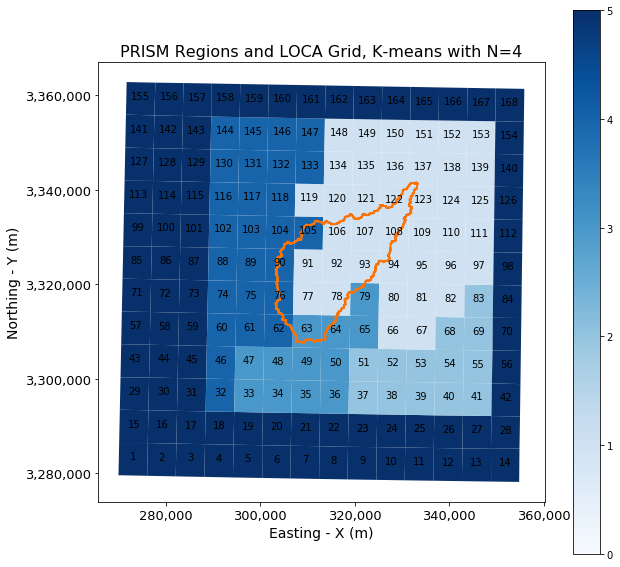

In [127]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMarCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

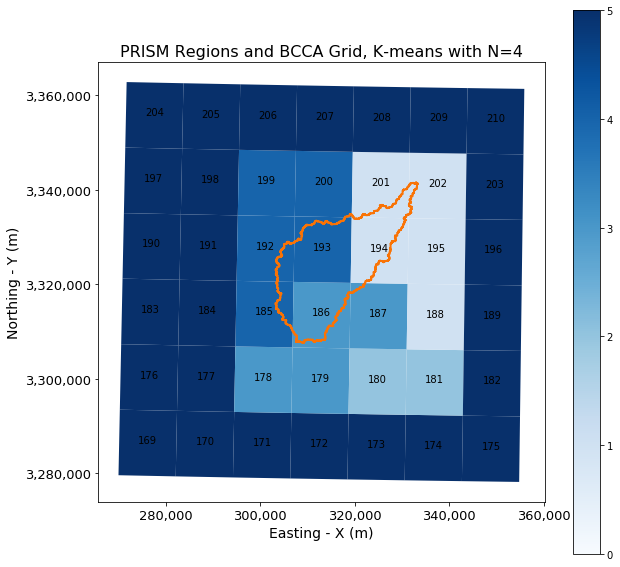

In [128]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMarCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCMarCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

In [129]:
gpdLOAprCluster[NColN] = gpdLOAprCluster[KeepCols[0]]
gpdLOAprCluster[NamCoord] = gpdLOAprCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [130]:
gpdLOAprCluster['Grid_Id'] = gpdLOAprCluster.index + 1

In [131]:
gpdLOAprCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOAprCluster.sort_index( axis=0, ascending=True, inplace=True )

In [132]:
display( HTML( gpdLOAprCluster.head().to_html() ) )

In [133]:
gpdBCAprCluster[NColN] = gpdBCAprCluster[KeepCols[0]]
gpdBCAprCluster[NamCoord] = gpdBCAprCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [134]:
gpdBCAprCluster['Grid_Id'] = gpdBCAprCluster.index + BCCA_START

In [135]:
gpdBCAprCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCAprCluster.sort_index( axis=0, ascending=True, inplace=True )

In [136]:
display( HTML( gpdBCAprCluster.head().to_html() ) )

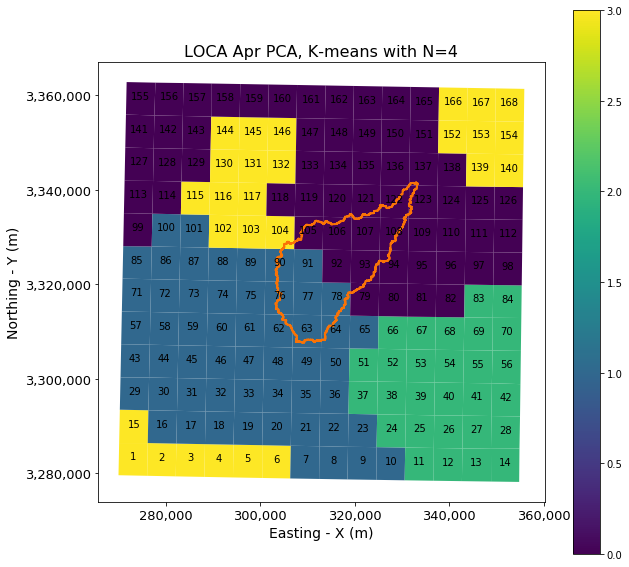

In [137]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAprCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

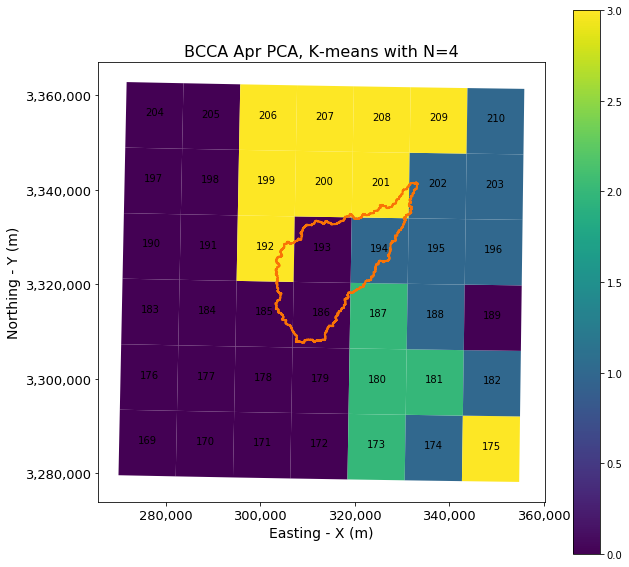

In [138]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAprCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [139]:
LOMapDict = { 0 : 1,
              2 : 2,
              1 : 3,
              3 : 4 }
BCMapDict = { 1 : 1,
              2 : 2,
              0 : 3,
              3 : 4
}

In [140]:
gpdLOAprCluster[NColN] = gpdLOAprCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCAprCluster[NColN] = gpdBCAprCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

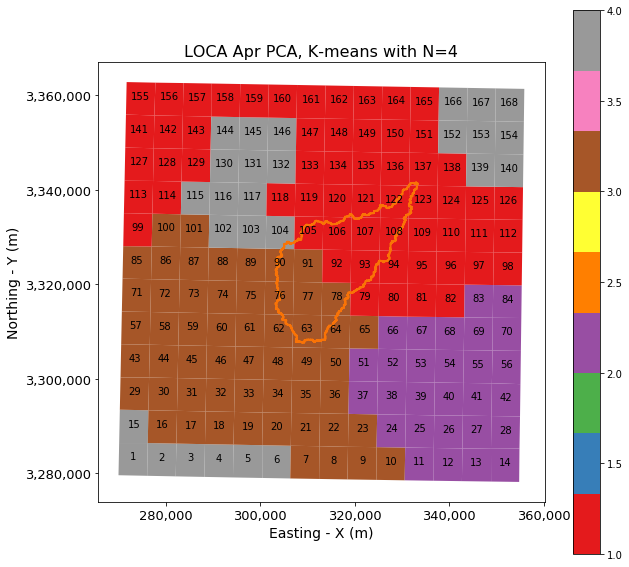

In [141]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAprCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [142]:
gpdLOAprCluster.at[166:168, NColN] = 1
gpdLOAprCluster.at[152:154, NColN] = 1
gpdLOAprCluster.at[139:140, NColN] = 1
gpdLOAprCluster.at[1:6, NColN] = 3
gpdLOAprCluster.at[15, NColN] = 3
gpdLOAprCluster.at[155:160, NColN] = 4
gpdLOAprCluster.at[141:143, NColN] = 4
gpdLOAprCluster.at[127:129, NColN] = 4
gpdLOAprCluster.at[113:114, NColN] = 4
gpdLOAprCluster.at[99, NColN] = 4

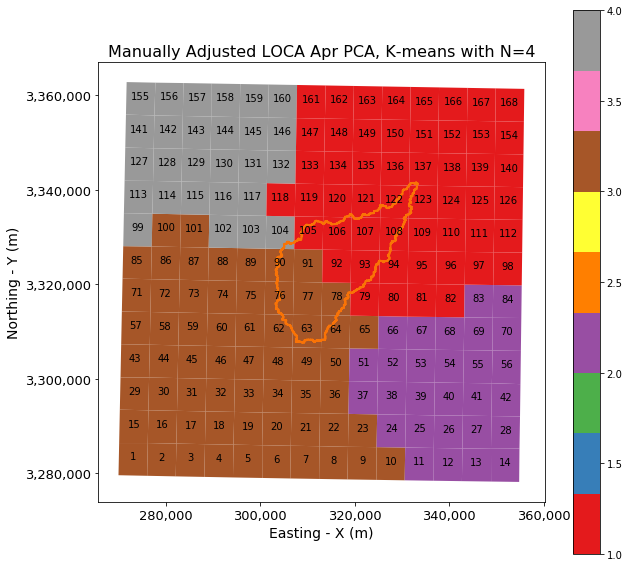

In [143]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAprCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

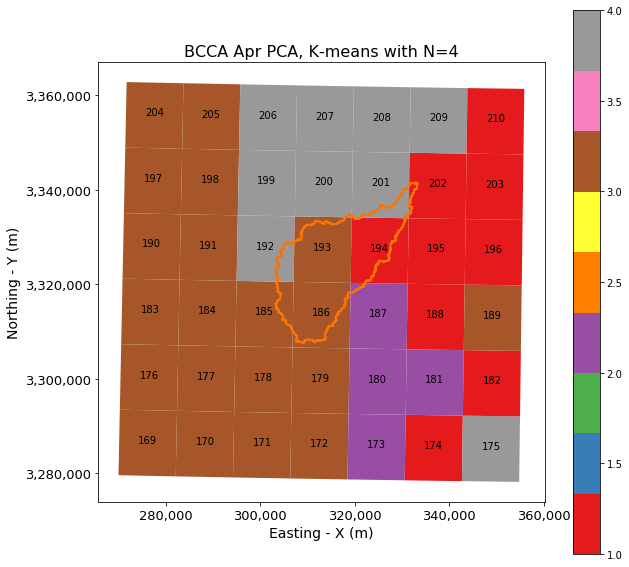

In [144]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAprCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [145]:
gpdBCAprCluster.at[189, NColN] = 1
gpdBCAprCluster.at[182, NColN] = 2
gpdBCAprCluster.at[174:175, NColN] = 2

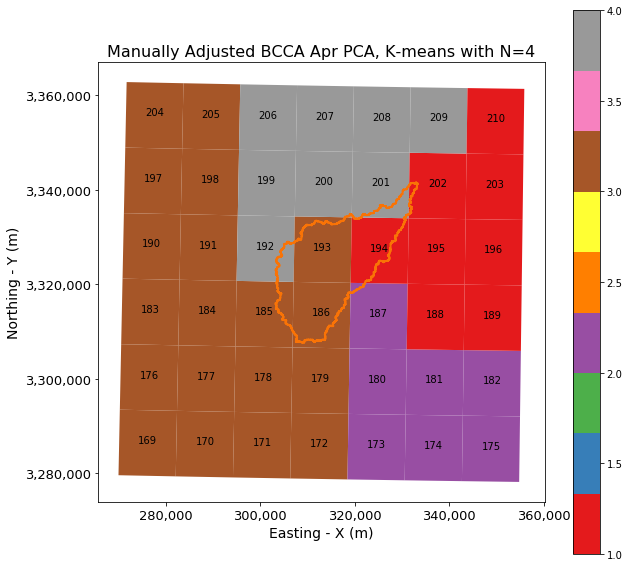

In [146]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAprCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Apr PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [147]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOAprMergeDF = gpdLOAprCluster[MonthMergeCols].copy()

In [148]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCAprMergeDF = gpdBCAprCluster[MonthMergeCols].copy()

In [149]:
AprLOCompP = LOPtsMergeDF.merge( LOAprMergeDF, left_index=True, right_index=True )
AprBCCompP = BCPtsMergeDF.merge( BCAprMergeDF, left_index=True, right_index=True )

In [150]:
AprLOCompP.crs = UTMCRS
AprBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [151]:
PRregApr.drop( columns='Id', inplace=True )
PRregApr['PRegion_Id'] = PRregApr['Region_Id']
PRregApr.set_index( keys="Region_Id", inplace=True )

In [152]:
AprLOCompP["PRegion_Id"] = 5

In [153]:
AprLOCompP["Intersects"] = AprLOCompP.intersects( PRregApr.loc[1, 'geometry'] )
AprLOCompP.at[AprLOCompP["Intersects"], "PRegion_Id"] = 1
AprLOCompP["Intersects"] = AprLOCompP.intersects( PRregApr.loc[2, 'geometry'] )
AprLOCompP.at[AprLOCompP["Intersects"], "PRegion_Id"] = 2
AprLOCompP["Intersects"] = AprLOCompP.intersects( PRregApr.loc[3, 'geometry'] )
AprLOCompP.at[AprLOCompP["Intersects"], "PRegion_Id"] = 3
AprLOCompP["Intersects"] = AprLOCompP.intersects( PRregApr.loc[4, 'geometry'] )
AprLOCompP.at[AprLOCompP["Intersects"], "PRegion_Id"] = 4

In [154]:
AprLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.136905    2.375000    3.488095
std      3.462373    4.04318    1.071825    1.087146    1.677566
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    0.000000    1.000000    2.000000
50%      5.500000    6.50000    1.000000    3.000000    4.000000
75%      8.250000   10.00000    2.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [155]:
AprBCCompP["PRegion_Id"] = 5

In [156]:
AprBCCompP["Intersects"] = AprBCCompP.intersects( PRregApr.loc[1, 'geometry'] )
AprBCCompP.at[AprBCCompP["Intersects"], "PRegion_Id"] = 1
AprBCCompP["Intersects"] = AprBCCompP.intersects( PRregApr.loc[2, 'geometry'] )
AprBCCompP.at[AprBCCompP["Intersects"], "PRegion_Id"] = 2
AprBCCompP["Intersects"] = AprBCCompP.intersects( PRregApr.loc[3, 'geometry'] )
AprBCCompP.at[AprBCCompP["Intersects"], "PRegion_Id"] = 3
AprBCCompP["Intersects"] = AprBCCompP.intersects( PRregApr.loc[4, 'geometry'] )
AprBCCompP.at[AprBCCompP["Intersects"], "PRegion_Id"] = 4

In [157]:
AprBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.047619   2.642857    4.000000
std     1.728527   2.024243   1.208756   1.007809    1.481594
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   0.000000   2.000000    3.000000
50%     2.500000   3.000000   1.000000   3.000000    5.000000
75%     4.000000   5.000000   2.000000   3.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [158]:
gpdLOAprCluster["PRegion_Id"] = np.array( AprLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCAprCluster["PRegion_Id"] = np.array( AprBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

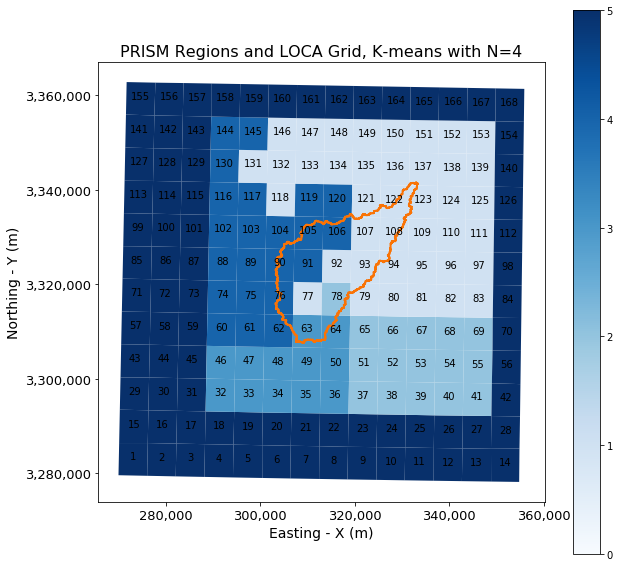

In [159]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAprCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

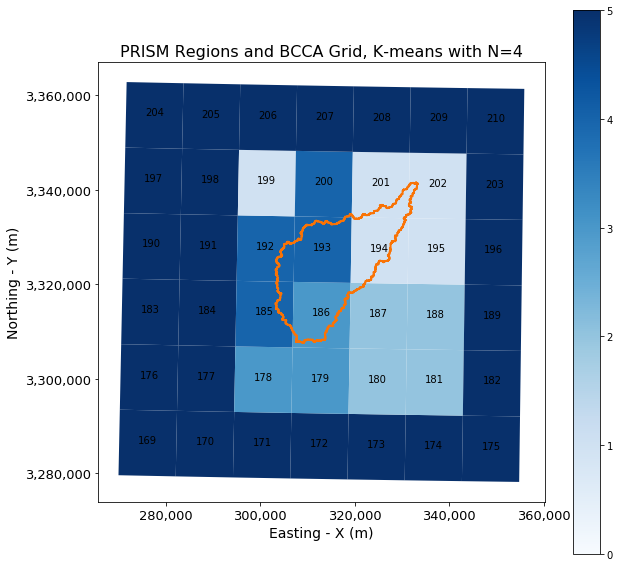

In [160]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAprCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCAprCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

In [161]:
gpdLOMayCluster[NColN] = gpdLOMayCluster[KeepCols[0]]
gpdLOMayCluster[NamCoord] = gpdLOMayCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [162]:
gpdLOMayCluster['Grid_Id'] = gpdLOMayCluster.index + 1

In [163]:
gpdLOMayCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOMayCluster.sort_index( axis=0, ascending=True, inplace=True )

In [164]:
display( HTML( gpdLOMayCluster.head().to_html() ) )

In [165]:
gpdBCMayCluster[NColN] = gpdBCMayCluster[KeepCols[0]]
gpdBCMayCluster[NamCoord] = gpdBCMayCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [166]:
gpdBCMayCluster['Grid_Id'] = gpdBCMayCluster.index + BCCA_START

In [167]:
gpdBCMayCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCMayCluster.sort_index( axis=0, ascending=True, inplace=True )

In [168]:
display( HTML( gpdBCMayCluster.head().to_html() ) )

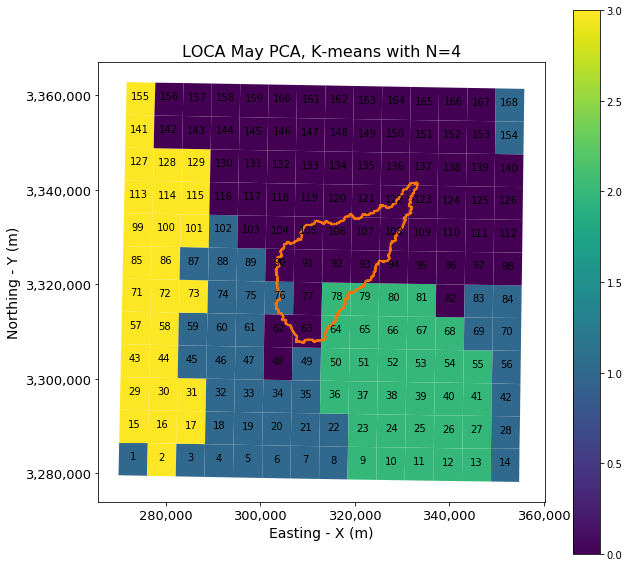

In [169]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMayCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

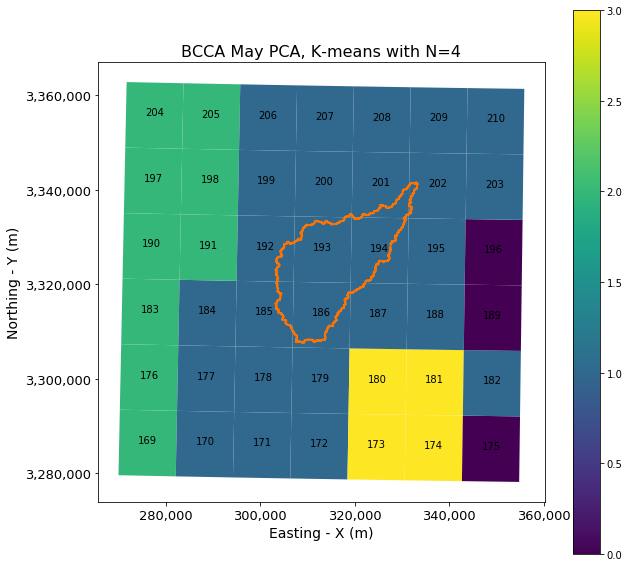

In [170]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMayCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [171]:
LOMapDict = { 0 : 1,
              2 : 2,
              1 : 3,
              3 : 4 }
BCMapDict = { 1 : 1,
              0 : 2,
              3 : 3,
              2 : 4
}

In [172]:
gpdLOMayCluster[NColN] = gpdLOMayCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCMayCluster[NColN] = gpdBCMayCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

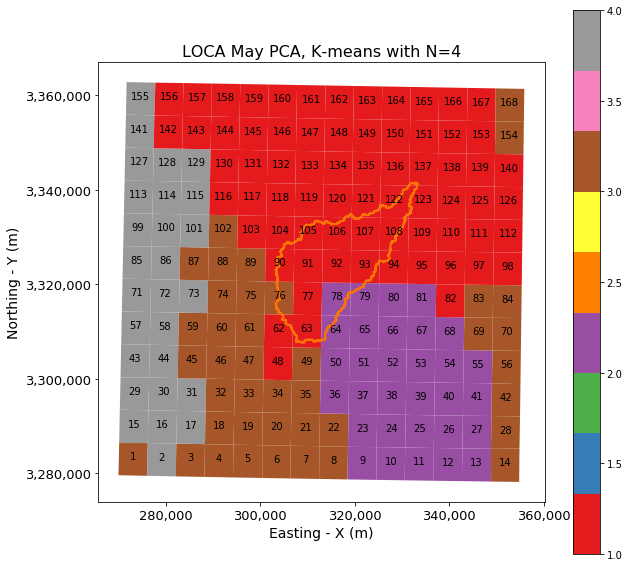

In [173]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMayCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [174]:
gpdLOMayCluster.at[154, NColN] = 1
gpdLOMayCluster.at[168, NColN] = 1
gpdLOMayCluster.at[83:84, NColN] = 2
gpdLOMayCluster.at[69:70, NColN] = 2
gpdLOMayCluster.at[56, NColN] = 2
gpdLOMayCluster.at[42, NColN] = 2
gpdLOMayCluster.at[28, NColN] = 2
gpdLOMayCluster.at[14, NColN] = 2
gpdLOMayCluster.at[1, NColN] = 4

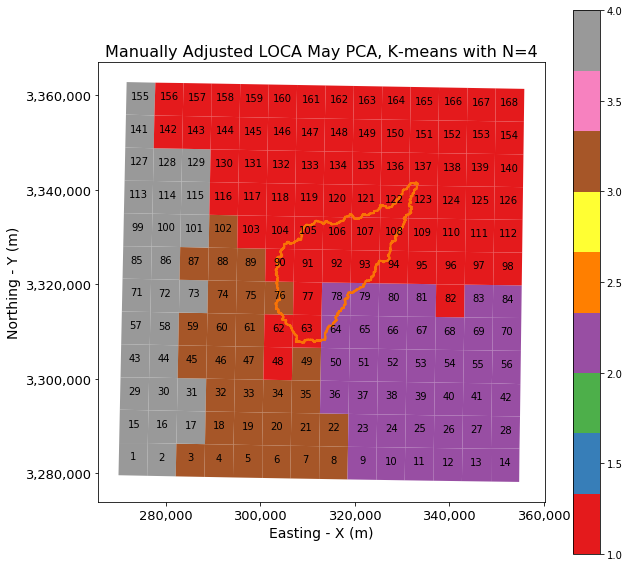

In [175]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMayCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

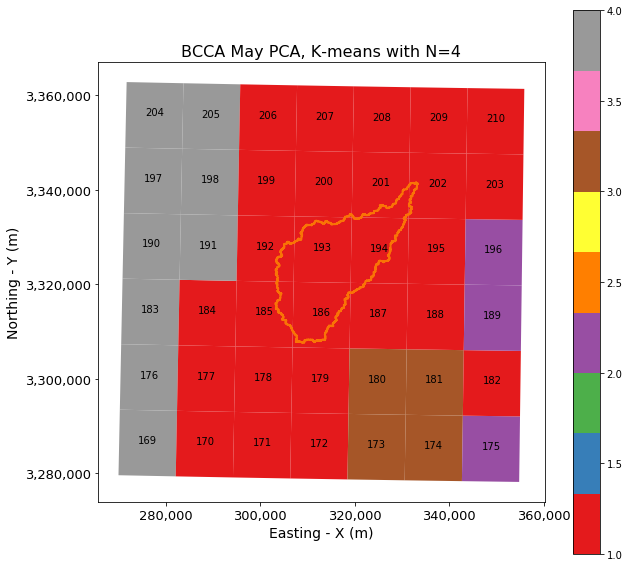

In [176]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMayCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [177]:
gpdBCMayCluster.at[182, NColN] = 2

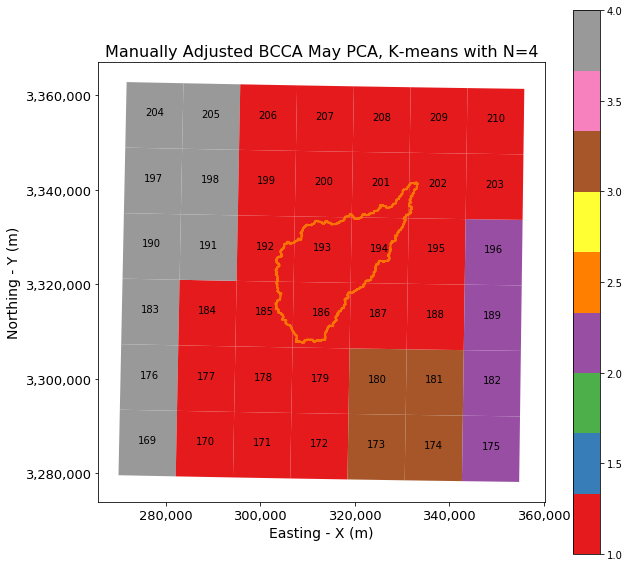

In [178]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMayCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA May PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [179]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOMayMergeDF = gpdLOMayCluster[MonthMergeCols].copy()

In [180]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCMayMergeDF = gpdBCMayCluster[MonthMergeCols].copy()

In [181]:
MayLOCompP = LOPtsMergeDF.merge( LOMayMergeDF, left_index=True, right_index=True )
MayBCCompP = BCPtsMergeDF.merge( BCMayMergeDF, left_index=True, right_index=True )

In [182]:
MayLOCompP.crs = UTMCRS
MayBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [183]:
PRregMay.drop( columns='Id', inplace=True )
PRregMay['PRegion_Id'] = PRregMay['Region_Id']
PRregMay.set_index( keys="Region_Id", inplace=True )

In [184]:
MayLOCompP["PRegion_Id"] = 5

In [185]:
MayLOCompP["Intersects"] = MayLOCompP.intersects( PRregMay.loc[1, 'geometry'] )
MayLOCompP.at[MayLOCompP["Intersects"], "PRegion_Id"] = 1
MayLOCompP["Intersects"] = MayLOCompP.intersects( PRregMay.loc[2, 'geometry'] )
MayLOCompP.at[MayLOCompP["Intersects"], "PRegion_Id"] = 2
MayLOCompP["Intersects"] = MayLOCompP.intersects( PRregMay.loc[3, 'geometry'] )
MayLOCompP.at[MayLOCompP["Intersects"], "PRegion_Id"] = 3
MayLOCompP["Intersects"] = MayLOCompP.intersects( PRregMay.loc[4, 'geometry'] )
MayLOCompP.at[MayLOCompP["Intersects"], "PRegion_Id"] = 4

In [186]:
MayLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.089286    2.077381    3.583333
std      3.462373    4.04318    1.115113    1.126688    1.553118
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    0.000000    1.000000    2.000000
50%      5.500000    6.50000    1.000000    2.000000    4.000000
75%      8.250000   10.00000    2.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [187]:
MayBCCompP["PRegion_Id"] = 5

In [188]:
MayBCCompP["Intersects"] = MayBCCompP.intersects( PRregMay.loc[1, 'geometry'] )
MayBCCompP.at[MayBCCompP["Intersects"], "PRegion_Id"] = 1
MayBCCompP["Intersects"] = MayBCCompP.intersects( PRregMay.loc[2, 'geometry'] )
MayBCCompP.at[MayBCCompP["Intersects"], "PRegion_Id"] = 2
MayBCCompP["Intersects"] = MayBCCompP.intersects( PRregMay.loc[3, 'geometry'] )
MayBCCompP.at[MayBCCompP["Intersects"], "PRegion_Id"] = 3
MayBCCompP["Intersects"] = MayBCCompP.intersects( PRregMay.loc[4, 'geometry'] )
MayBCCompP.at[MayBCCompP["Intersects"], "PRegion_Id"] = 4

In [189]:
MayBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.333333   1.928571    4.047619
std     1.728527   2.024243   0.754391   1.257036    1.378447
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   1.000000   1.000000    3.000000
50%     2.500000   3.000000   1.000000   1.000000    5.000000
75%     4.000000   5.000000   2.000000   3.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [190]:
gpdLOMayCluster["PRegion_Id"] = np.array( MayLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCMayCluster["PRegion_Id"] = np.array( MayBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

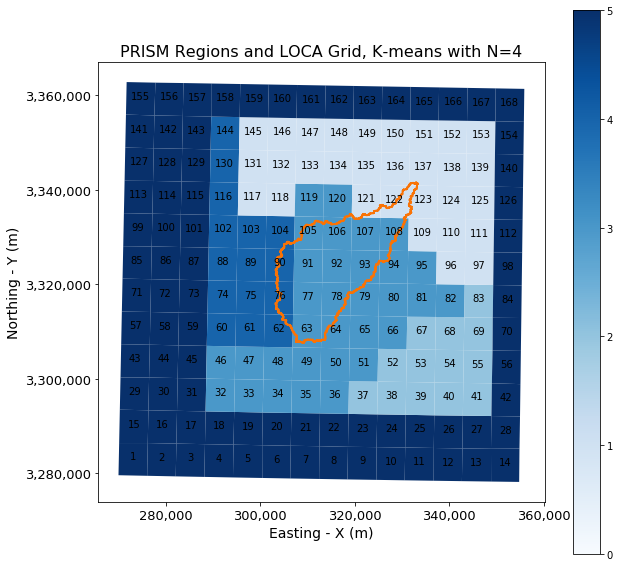

In [191]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOMayCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

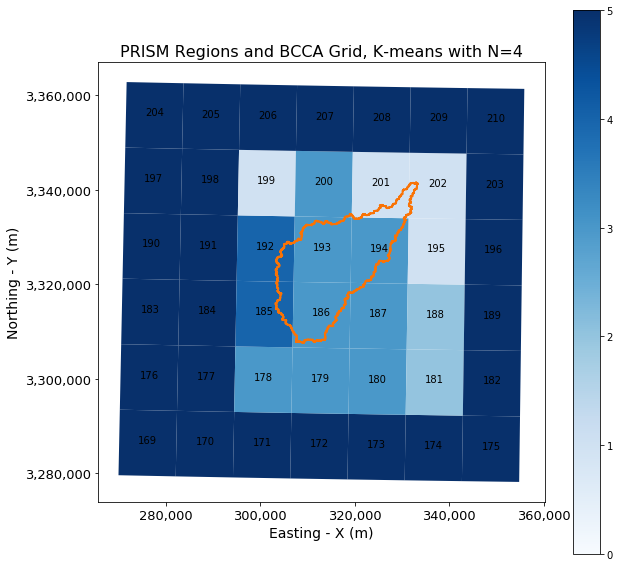

In [192]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCMayCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCMayCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

In [193]:
gpdLOJunCluster[NColN] = gpdLOJunCluster[KeepCols[0]]
gpdLOJunCluster[NamCoord] = gpdLOJunCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [194]:
gpdLOJunCluster['Grid_Id'] = gpdLOJunCluster.index + 1

In [195]:
gpdLOJunCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOJunCluster.sort_index( axis=0, ascending=True, inplace=True )

In [196]:
display( HTML( gpdLOJunCluster.head().to_html() ) )

In [197]:
gpdBCJunCluster[NColN] = gpdBCJunCluster[KeepCols[0]]
gpdBCJunCluster[NamCoord] = gpdBCJunCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [198]:
gpdBCJunCluster['Grid_Id'] = gpdBCJunCluster.index + BCCA_START

In [199]:
gpdBCJunCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCJunCluster.sort_index( axis=0, ascending=True, inplace=True )

In [200]:
display( HTML( gpdBCJunCluster.head().to_html() ) )

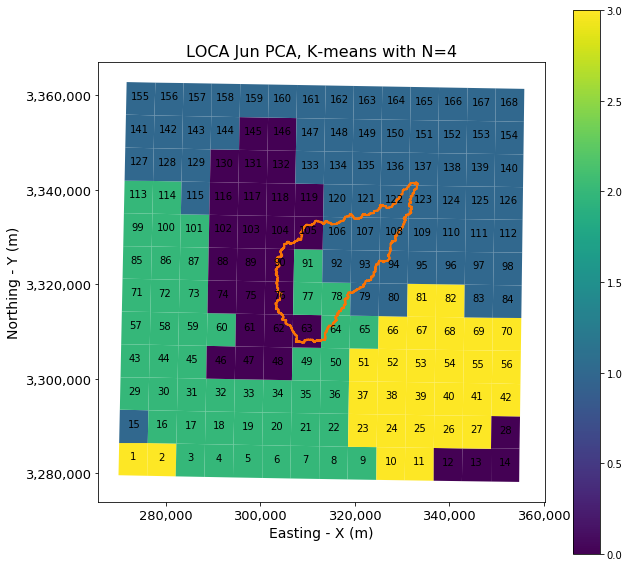

In [201]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJunCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

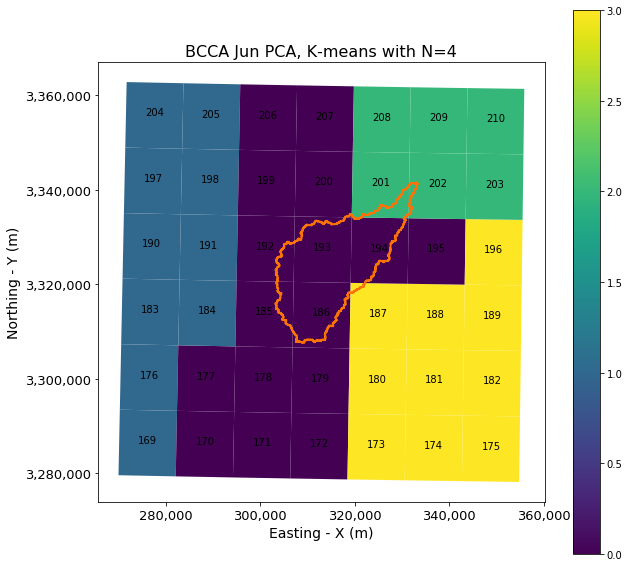

In [202]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJunCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [203]:
LOMapDict = { 1 : 1,
              3 : 2,
              2 : 3,
              0 : 4 }
BCMapDict = { 2 : 1,
              3 : 2,
              0 : 3,
              1 : 4
}

In [204]:
gpdLOJunCluster[NColN] = gpdLOJunCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCJunCluster[NColN] = gpdBCJunCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

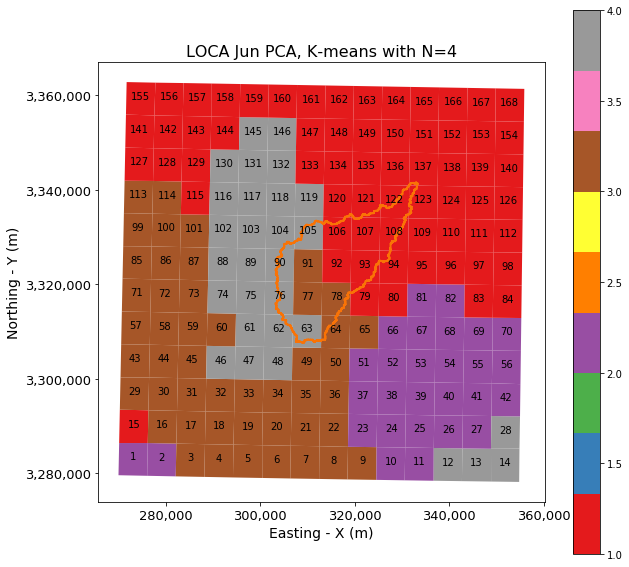

In [205]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJunCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [206]:
gpdLOJunCluster.at[12:14, NColN] = 2
gpdLOJunCluster.at[28, NColN] = 2
gpdLOJunCluster.at[15, NColN] = 3
gpdLOJunCluster.at[1:2, NColN] = 3
gpdLOJunCluster.at[155:160, NColN] = 4
gpdLOJunCluster.at[141:144, NColN] = 4
gpdLOJunCluster.at[127:129, NColN] = 4
gpdLOJunCluster.at[115, NColN] = 4

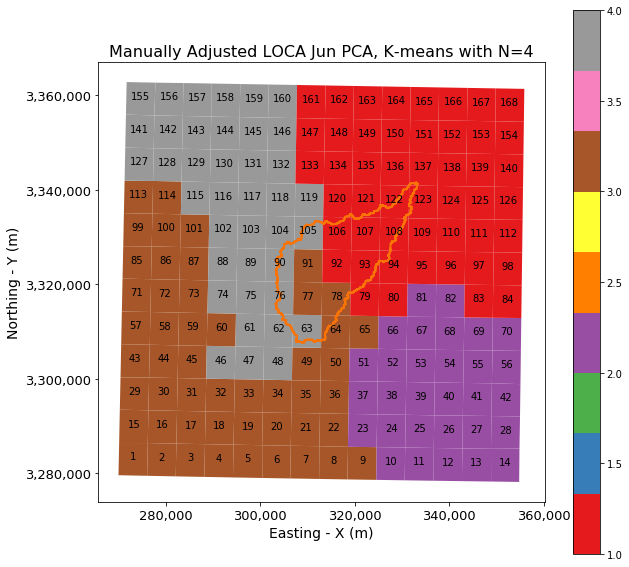

In [207]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJunCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

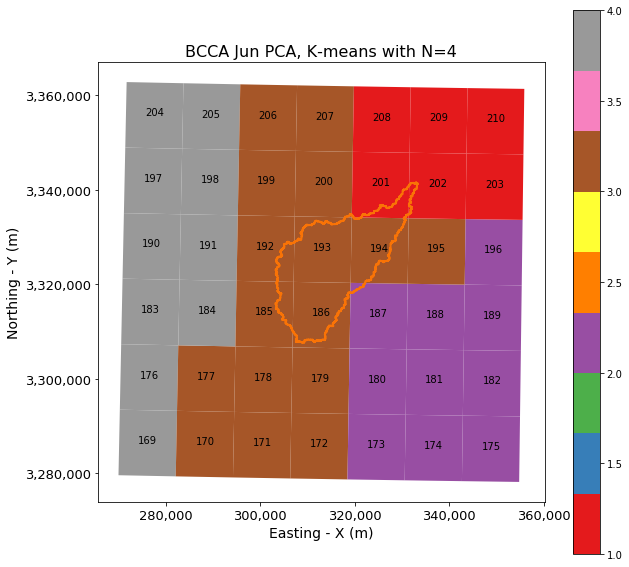

In [208]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJunCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [209]:
#gpdBCJunCluster.at[175, NColN] = 2

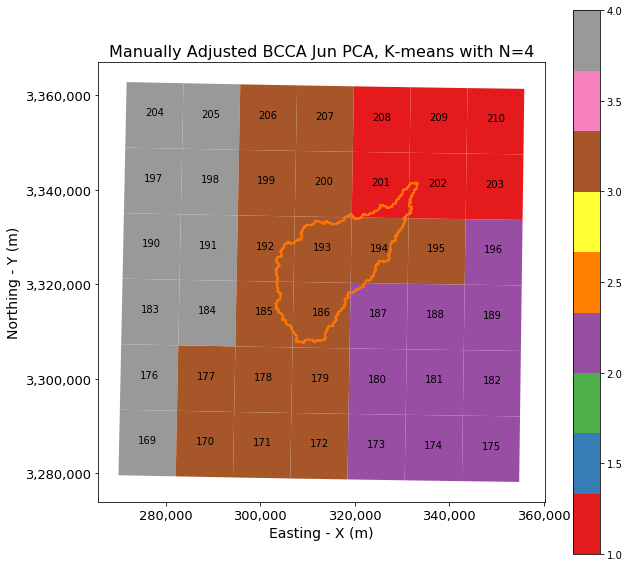

In [210]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJunCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Jun PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [211]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOJunMergeDF = gpdLOJunCluster[MonthMergeCols].copy()

In [212]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCJunMergeDF = gpdBCJunCluster[MonthMergeCols].copy()

In [213]:
JunLOCompP = LOPtsMergeDF.merge( LOJunMergeDF, left_index=True, right_index=True )
JunBCCompP = BCPtsMergeDF.merge( BCJunMergeDF, left_index=True, right_index=True )

In [214]:
JunLOCompP.crs = UTMCRS
JunBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [215]:
PRregJun.drop( columns='Id', inplace=True )
PRregJun['PRegion_Id'] = PRregJun['Region_Id']
PRregJun.set_index( keys="Region_Id", inplace=True )

In [216]:
JunLOCompP["PRegion_Id"] = 5

In [217]:
JunLOCompP["Intersects"] = JunLOCompP.intersects( PRregJun.loc[1, 'geometry'] )
JunLOCompP.at[JunLOCompP["Intersects"], "PRegion_Id"] = 1
JunLOCompP["Intersects"] = JunLOCompP.intersects( PRregJun.loc[2, 'geometry'] )
JunLOCompP.at[JunLOCompP["Intersects"], "PRegion_Id"] = 2
JunLOCompP["Intersects"] = JunLOCompP.intersects( PRregJun.loc[3, 'geometry'] )
JunLOCompP.at[JunLOCompP["Intersects"], "PRegion_Id"] = 3
JunLOCompP["Intersects"] = JunLOCompP.intersects( PRregJun.loc[4, 'geometry'] )
JunLOCompP.at[JunLOCompP["Intersects"], "PRegion_Id"] = 4

In [218]:
JunLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.440476    2.470238    3.595238
std      3.462373    4.04318    0.964659    1.142146    1.513366
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    1.000000    3.000000
50%      5.500000    6.50000    1.000000    3.000000    4.000000
75%      8.250000   10.00000    2.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [219]:
JunBCCompP["PRegion_Id"] = 5

In [220]:
JunBCCompP["Intersects"] = JunBCCompP.intersects( PRregJun.loc[1, 'geometry'] )
JunBCCompP.at[JunBCCompP["Intersects"], "PRegion_Id"] = 1
JunBCCompP["Intersects"] = JunBCCompP.intersects( PRregJun.loc[2, 'geometry'] )
JunBCCompP.at[JunBCCompP["Intersects"], "PRegion_Id"] = 2
JunBCCompP["Intersects"] = JunBCCompP.intersects( PRregJun.loc[3, 'geometry'] )
JunBCCompP.at[JunBCCompP["Intersects"], "PRegion_Id"] = 3
JunBCCompP["Intersects"] = JunBCCompP.intersects( PRregJun.loc[4, 'geometry'] )
JunBCCompP.at[JunBCCompP["Intersects"], "PRegion_Id"] = 4

In [221]:
JunBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.238095   2.714286    4.095238
std     1.728527   2.024243   1.205870   0.994760    1.303083
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   0.000000   2.000000    3.000000
50%     2.500000   3.000000   1.000000   3.000000    5.000000
75%     4.000000   5.000000   2.000000   3.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [222]:
gpdLOJunCluster["PRegion_Id"] = np.array( JunLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCJunCluster["PRegion_Id"] = np.array( JunBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

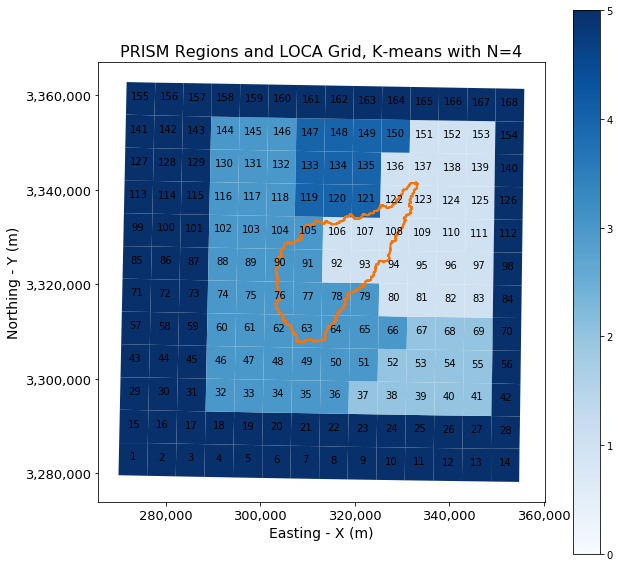

In [223]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJunCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

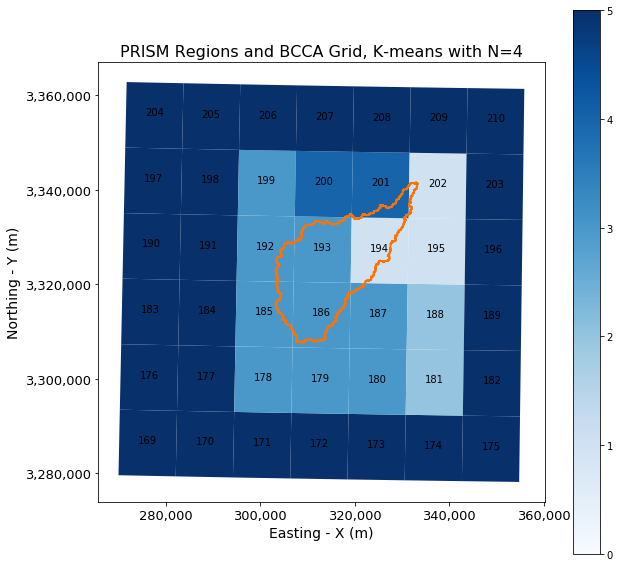

In [224]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJunCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCJunCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

In [225]:
gpdLOJulCluster[NColN] = gpdLOJulCluster[KeepCols[0]]
gpdLOJulCluster[NamCoord] = gpdLOJulCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [226]:
gpdLOJulCluster['Grid_Id'] = gpdLOJulCluster.index + 1

In [227]:
gpdLOJulCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOJulCluster.sort_index( axis=0, ascending=True, inplace=True )

In [228]:
display( HTML( gpdLOJulCluster.head().to_html() ) )

In [229]:
gpdBCJulCluster[NColN] = gpdBCJulCluster[KeepCols[0]]
gpdBCJulCluster[NamCoord] = gpdBCJulCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [230]:
gpdBCJulCluster['Grid_Id'] = gpdBCJulCluster.index + BCCA_START

In [231]:
gpdBCJulCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCJulCluster.sort_index( axis=0, ascending=True, inplace=True )

In [232]:
display( HTML( gpdBCJulCluster.head().to_html() ) )

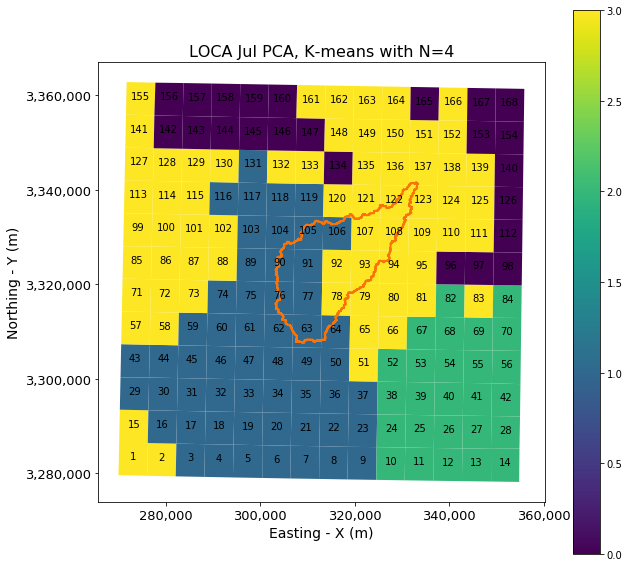

In [233]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJulCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

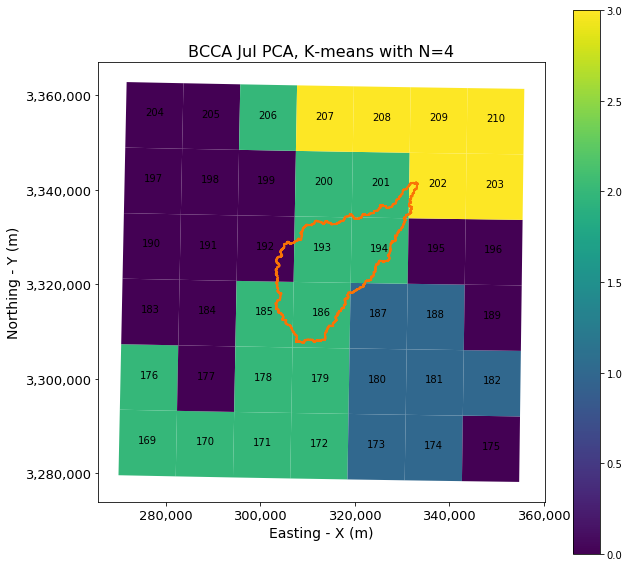

In [234]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJulCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [235]:
LOMapDict = { 3 : 1,
              2 : 2,
              1 : 3,
              0 : 4 }
BCMapDict = { 3 : 1,
              1 : 2,
              2 : 3,
              0 : 4
}

In [236]:
gpdLOJulCluster[NColN] = gpdLOJulCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCJulCluster[NColN] = gpdBCJulCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

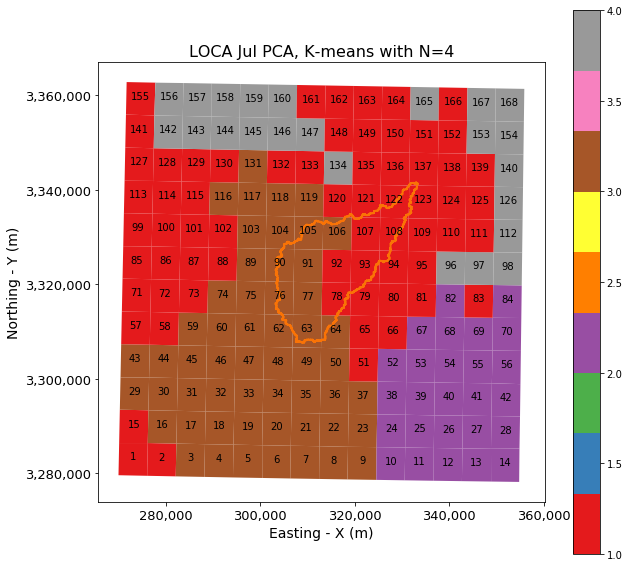

In [237]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJulCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [238]:
gpdLOJulCluster.at[165, NColN] = 1
gpdLOJulCluster.at[167:168, NColN] = 1
gpdLOJulCluster.at[153:154, NColN] = 1
gpdLOJulCluster.at[140, NColN] = 1
gpdLOJulCluster.at[126, NColN] = 1
gpdLOJulCluster.at[112, NColN] = 1
gpdLOJulCluster.at[96:98, NColN] = 1
gpdLOJulCluster.at[83, NColN] = 2
gpdLOJulCluster.at[127:133, NColN] = 4
gpdLOJulCluster.at[155, NColN] = 4
gpdLOJulCluster.at[141, NColN] = 4
gpdLOJulCluster.at[15, NColN] = 3
gpdLOJulCluster.at[1:2, NColN] = 3
gpdLOJulCluster.at[113:115, NColN] = 4
gpdLOJulCluster.at[99:102, NColN] = 4
gpdLOJulCluster.at[85:88, NColN] = 4
gpdLOJulCluster.at[71:73, NColN] = 4
gpdLOJulCluster.at[57:58, NColN] = 4

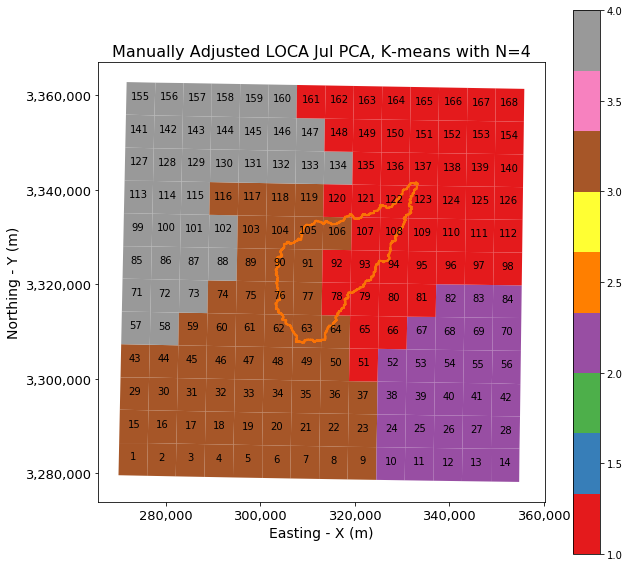

In [239]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJulCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

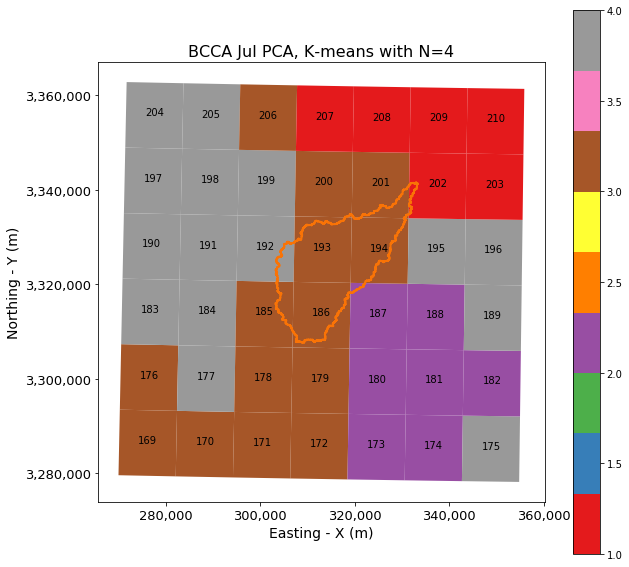

In [240]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJulCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [241]:
gpdBCJulCluster.at[195:196, NColN] = 2
gpdBCJulCluster.at[189, NColN] = 2
gpdBCJulCluster.at[175, NColN] = 2
gpdBCJulCluster.at[206, NColN] = 4

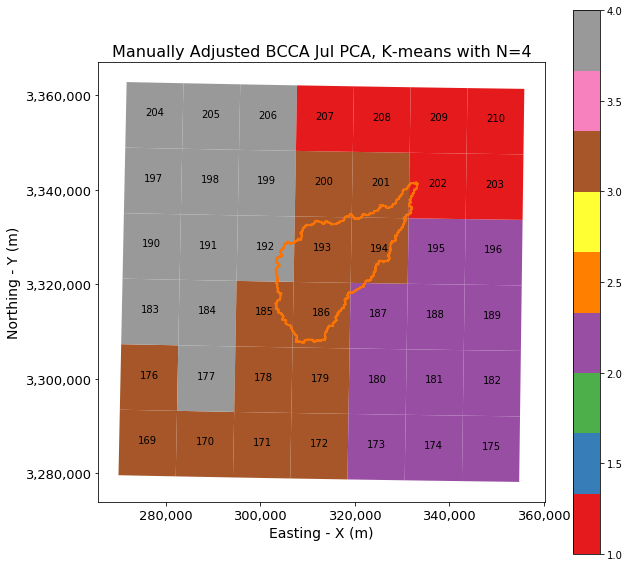

In [242]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJulCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Jul PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [243]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOJulMergeDF = gpdLOJulCluster[MonthMergeCols].copy()

In [244]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCJulMergeDF = gpdBCJulCluster[MonthMergeCols].copy()

In [245]:
JulLOCompP = LOPtsMergeDF.merge( LOJulMergeDF, left_index=True, right_index=True )
JulBCCompP = BCPtsMergeDF.merge( BCJulMergeDF, left_index=True, right_index=True )

In [246]:
JulLOCompP.crs = UTMCRS
JulBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [247]:
PRregJul.drop( columns='Id', inplace=True )
PRregJul['PRegion_Id'] = PRregJul['Region_Id']
PRregJul.set_index( keys="Region_Id", inplace=True )

In [248]:
JulLOCompP["PRegion_Id"] = 5

In [249]:
JulLOCompP["Intersects"] = JulLOCompP.intersects( PRregJul.loc[1, 'geometry'] )
JulLOCompP.at[JulLOCompP["Intersects"], "PRegion_Id"] = 1
JulLOCompP["Intersects"] = JulLOCompP.intersects( PRregJul.loc[2, 'geometry'] )
JulLOCompP.at[JulLOCompP["Intersects"], "PRegion_Id"] = 2
JulLOCompP["Intersects"] = JulLOCompP.intersects( PRregJul.loc[3, 'geometry'] )
JulLOCompP.at[JulLOCompP["Intersects"], "PRegion_Id"] = 3
JulLOCompP["Intersects"] = JulLOCompP.intersects( PRregJul.loc[4, 'geometry'] )
JulLOCompP.at[JulLOCompP["Intersects"], "PRegion_Id"] = 4

In [250]:
JulLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.791667    2.488095    3.291667
std      3.462373    4.04318    1.104450    1.126640    1.765790
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    1.000000    1.000000
50%      5.500000    6.50000    2.000000    3.000000    4.000000
75%      8.250000   10.00000    3.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [251]:
JulBCCompP["PRegion_Id"] = 5

In [252]:
JulBCCompP["Intersects"] = JulBCCompP.intersects( PRregJul.loc[1, 'geometry'] )
JulBCCompP.at[JulBCCompP["Intersects"], "PRegion_Id"] = 1
JulBCCompP["Intersects"] = JulBCCompP.intersects( PRregJul.loc[2, 'geometry'] )
JulBCCompP.at[JulBCCompP["Intersects"], "PRegion_Id"] = 2
JulBCCompP["Intersects"] = JulBCCompP.intersects( PRregJul.loc[3, 'geometry'] )
JulBCCompP.at[JulBCCompP["Intersects"], "PRegion_Id"] = 3
JulBCCompP["Intersects"] = JulBCCompP.intersects( PRregJul.loc[4, 'geometry'] )
JulBCCompP.at[JulBCCompP["Intersects"], "PRegion_Id"] = 4

In [253]:
JulBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.261905   2.738095    3.666667
std     1.728527   2.024243   1.105629   1.037340    1.789763
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   0.000000   2.000000    1.250000
50%     2.500000   3.000000   1.000000   3.000000    5.000000
75%     4.000000   5.000000   2.000000   4.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [254]:
gpdLOJulCluster["PRegion_Id"] = np.array( JulLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCJulCluster["PRegion_Id"] = np.array( JulBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

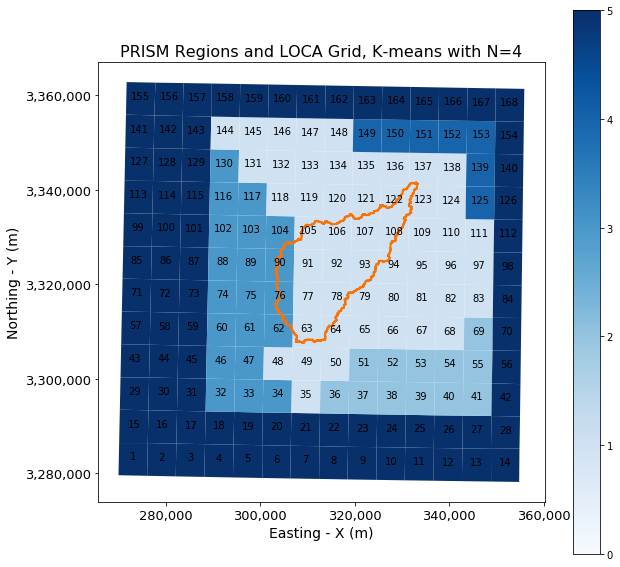

In [255]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOJulCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

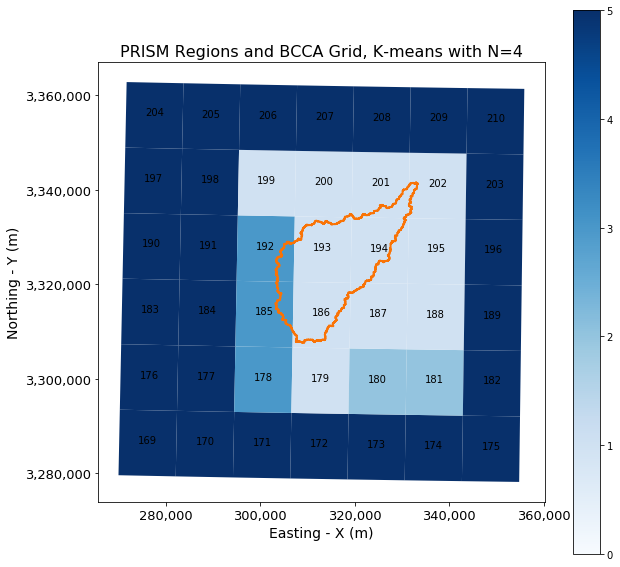

In [256]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCJulCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCJulCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

In [257]:
gpdLOAugCluster[NColN] = gpdLOAugCluster[KeepCols[0]]
gpdLOAugCluster[NamCoord] = gpdLOAugCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [258]:
gpdLOAugCluster['Grid_Id'] = gpdLOAugCluster.index + 1

In [259]:
gpdLOAugCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOAugCluster.sort_index( axis=0, ascending=True, inplace=True )

In [260]:
display( HTML( gpdLOAugCluster.head().to_html() ) )

In [261]:
gpdBCAugCluster[NColN] = gpdBCAugCluster[KeepCols[0]]
gpdBCAugCluster[NamCoord] = gpdBCAugCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [262]:
gpdBCAugCluster['Grid_Id'] = gpdBCAugCluster.index + BCCA_START

In [263]:
gpdBCAugCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCAugCluster.sort_index( axis=0, ascending=True, inplace=True )

In [264]:
display( HTML( gpdBCAugCluster.head().to_html() ) )

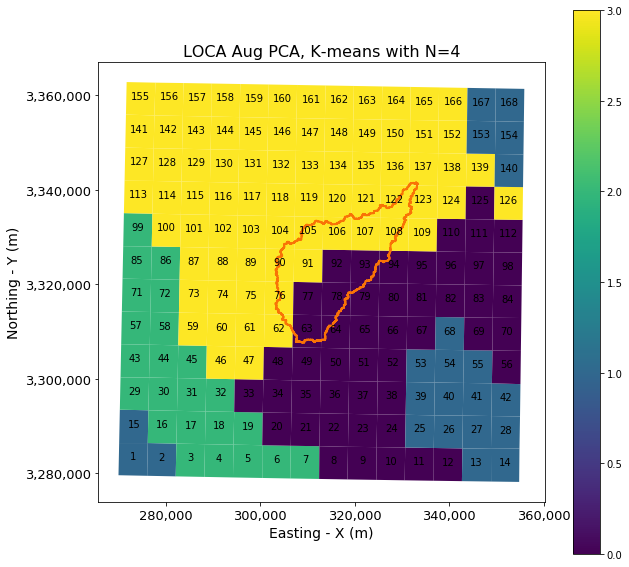

In [265]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAugCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

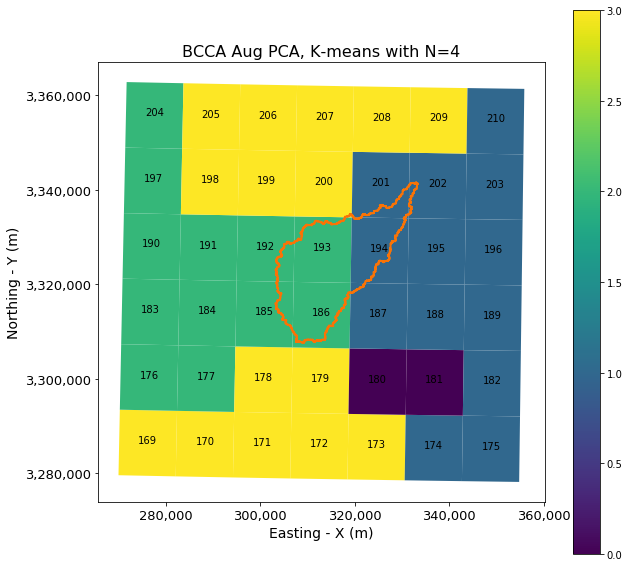

In [266]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAugCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [267]:
LOMapDict = { 3 : 1,
              1 : 2,
              0 : 3,
              2 : 4 }
BCMapDict = { 1 : 1,
              0 : 2,
              2 : 3,
              3 : 4
}

In [268]:
gpdLOAugCluster[NColN] = gpdLOAugCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCAugCluster[NColN] = gpdBCAugCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

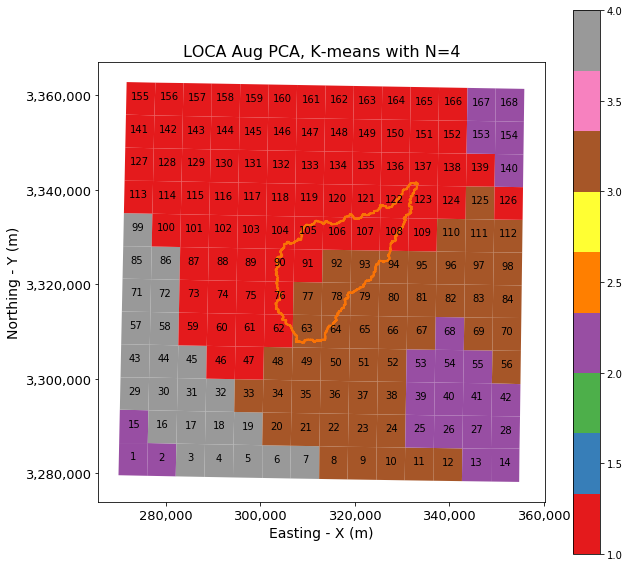

In [269]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAugCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [270]:
gpdLOAugCluster.at[167:168, NColN] = 1
gpdLOAugCluster.at[153:154, NColN] = 1
gpdLOAugCluster.at[140, NColN] = 1
gpdLOAugCluster.at[1:2, NColN] = 4
gpdLOAugCluster.at[15, NColN] = 4

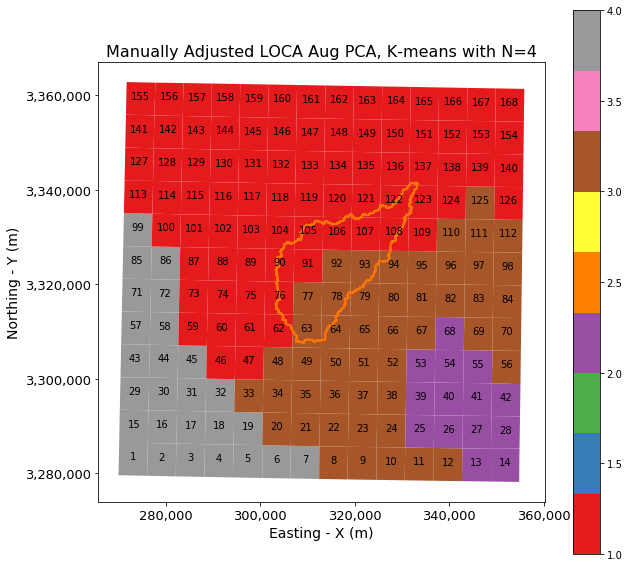

In [271]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAugCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

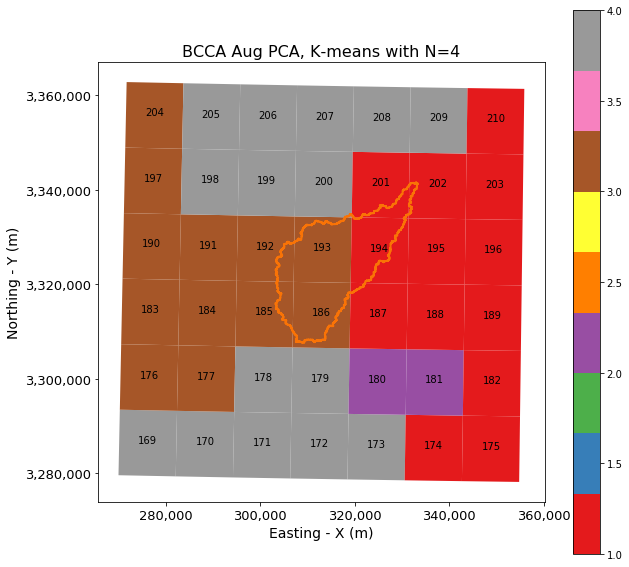

In [272]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAugCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [273]:
gpdBCAugCluster.at[182, NColN] = 2
gpdBCAugCluster.at[169:175, NColN] = 2
gpdBCAugCluster.at[178:179, NColN] = 3

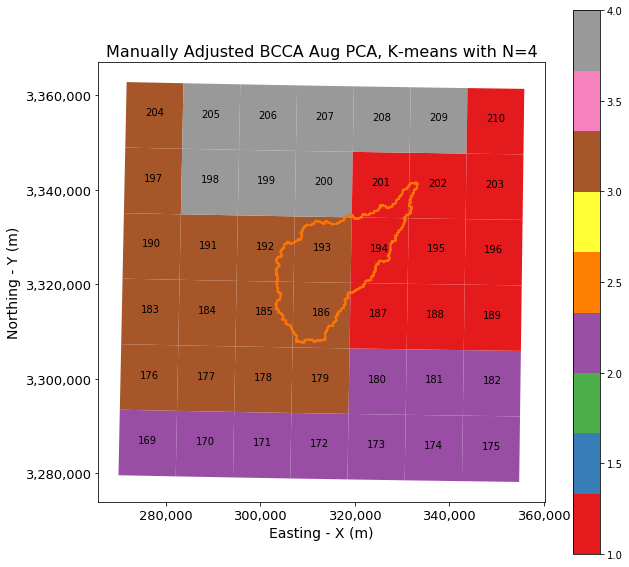

In [274]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAugCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Aug PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [275]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOAugMergeDF = gpdLOAugCluster[MonthMergeCols].copy()

In [276]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCAugMergeDF = gpdBCAugCluster[MonthMergeCols].copy()

In [277]:
AugLOCompP = LOPtsMergeDF.merge( LOAugMergeDF, left_index=True, right_index=True )
AugBCCompP = BCPtsMergeDF.merge( BCAugMergeDF, left_index=True, right_index=True )

In [278]:
AugLOCompP.crs = UTMCRS
AugBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [279]:
PRregAug.drop( columns='Id', inplace=True )
PRregAug['PRegion_Id'] = PRregAug['Region_Id']
PRregAug.set_index( keys="Region_Id", inplace=True )

In [280]:
AugLOCompP["PRegion_Id"] = 5

In [281]:
AugLOCompP["Intersects"] = AugLOCompP.intersects( PRregAug.loc[1, 'geometry'] )
AugLOCompP.at[AugLOCompP["Intersects"], "PRegion_Id"] = 1
AugLOCompP["Intersects"] = AugLOCompP.intersects( PRregAug.loc[2, 'geometry'] )
AugLOCompP.at[AugLOCompP["Intersects"], "PRegion_Id"] = 2
AugLOCompP["Intersects"] = AugLOCompP.intersects( PRregAug.loc[3, 'geometry'] )
AugLOCompP.at[AugLOCompP["Intersects"], "PRegion_Id"] = 3
AugLOCompP["Intersects"] = AugLOCompP.intersects( PRregAug.loc[4, 'geometry'] )
AugLOCompP.at[AugLOCompP["Intersects"], "PRegion_Id"] = 4

In [282]:
AugLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.744048    2.119048    3.619048
std      3.462373    4.04318    1.290207    1.172589    1.603923
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    0.000000    1.000000    2.000000
50%      5.500000    6.50000    2.000000    2.000000    4.000000
75%      8.250000   10.00000    3.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [283]:
AugBCCompP["PRegion_Id"] = 5

In [284]:
AugBCCompP["Intersects"] = AugBCCompP.intersects( PRregAug.loc[1, 'geometry'] )
AugBCCompP.at[AugBCCompP["Intersects"], "PRegion_Id"] = 1
AugBCCompP["Intersects"] = AugBCCompP.intersects( PRregAug.loc[2, 'geometry'] )
AugBCCompP.at[AugBCCompP["Intersects"], "PRegion_Id"] = 2
AugBCCompP["Intersects"] = AugBCCompP.intersects( PRregAug.loc[3, 'geometry'] )
AugBCCompP.at[AugBCCompP["Intersects"], "PRegion_Id"] = 3
AugBCCompP["Intersects"] = AugBCCompP.intersects( PRregAug.loc[4, 'geometry'] )
AugBCCompP.at[AugBCCompP["Intersects"], "PRegion_Id"] = 4

In [285]:
AugBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000   42.00000   42.000000
mean    2.500000   3.000000   1.952381    2.47619    4.095238
std     1.728527   2.024243   0.935802    1.06469    1.428107
min     0.000000   0.000000   0.000000    1.00000    1.000000
25%     1.000000   1.000000   1.000000    2.00000    4.000000
50%     2.500000   3.000000   2.000000    3.00000    5.000000
75%     4.000000   5.000000   3.000000    3.00000    5.000000
max     5.000000   6.000000   3.000000    4.00000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [286]:
gpdLOAugCluster["PRegion_Id"] = np.array( AugLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCAugCluster["PRegion_Id"] = np.array( AugBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

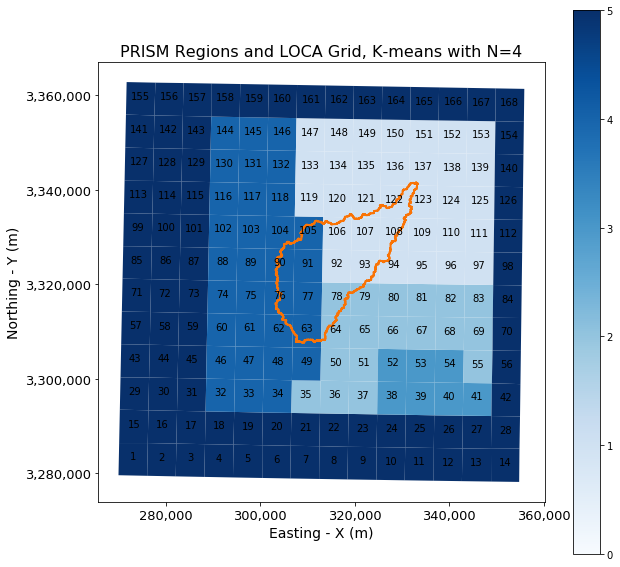

In [287]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOAugCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

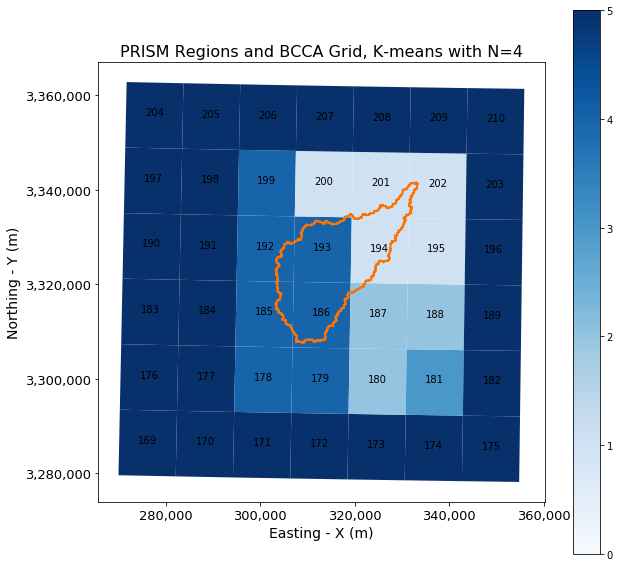

In [288]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCAugCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCAugCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

In [289]:
gpdLOSepCluster[NColN] = gpdLOSepCluster[KeepCols[0]]
gpdLOSepCluster[NamCoord] = gpdLOSepCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [290]:
gpdLOSepCluster['Grid_Id'] = gpdLOSepCluster.index + 1

In [291]:
gpdLOSepCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOSepCluster.sort_index( axis=0, ascending=True, inplace=True )

In [292]:
display( HTML( gpdLOSepCluster.head().to_html() ) )

In [293]:
gpdBCSepCluster[NColN] = gpdBCSepCluster[KeepCols[0]]
gpdBCSepCluster[NamCoord] = gpdBCSepCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [294]:
gpdBCSepCluster['Grid_Id'] = gpdBCSepCluster.index + BCCA_START

In [295]:
gpdBCSepCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCSepCluster.sort_index( axis=0, ascending=True, inplace=True )

In [296]:
display( HTML( gpdBCSepCluster.head().to_html() ) )

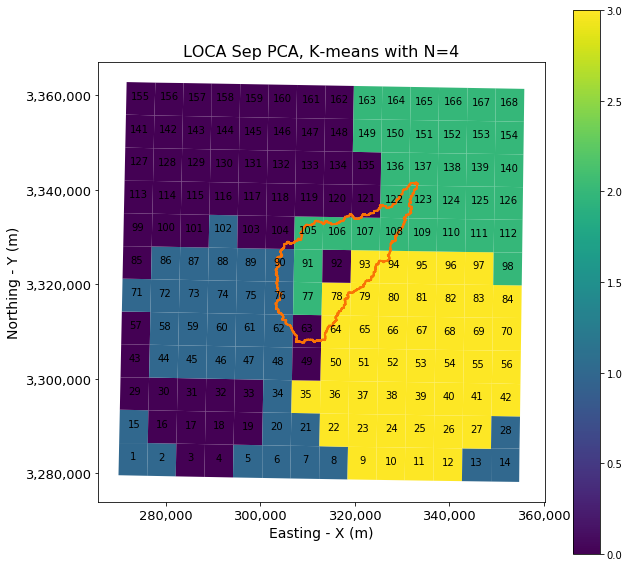

In [297]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOSepCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

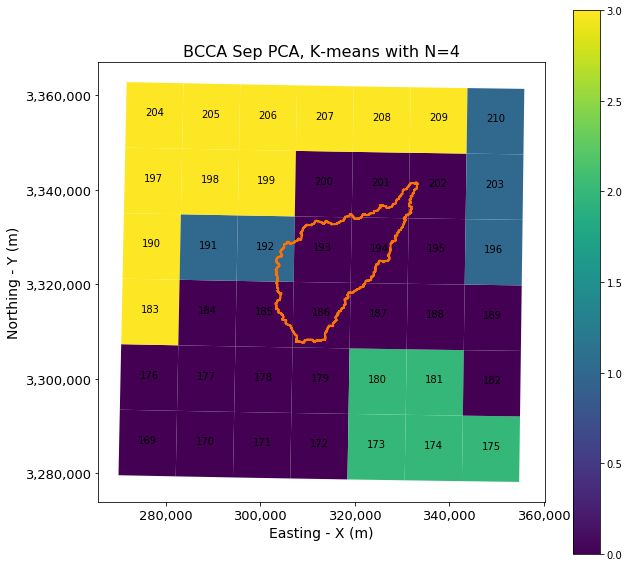

In [298]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCSepCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [299]:
LOMapDict = { 2 : 1,
              3 : 2,
              1 : 3,
              0 : 4 }
BCMapDict = { 1 : 1,
              2 : 2,
              0 : 3,
              3 : 4
}

In [300]:
gpdLOSepCluster[NColN] = gpdLOSepCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCSepCluster[NColN] = gpdBCSepCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

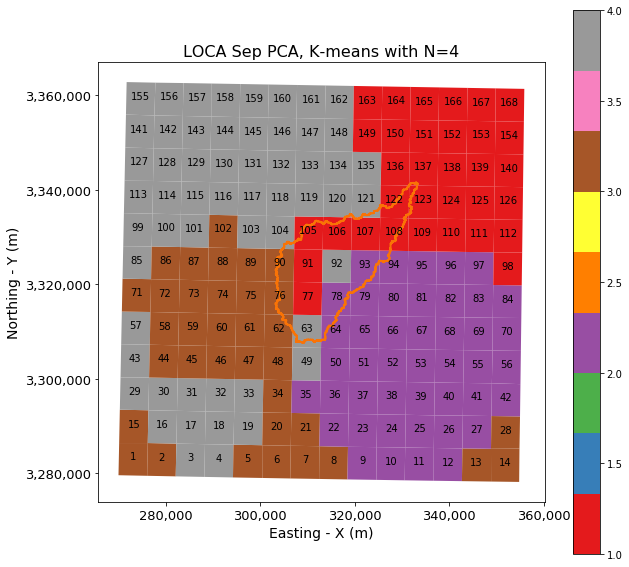

In [301]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOSepCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [302]:
gpdLOSepCluster.at[92, NColN] = 2
gpdLOSepCluster.at[63, NColN] = 2
gpdLOSepCluster.at[28, NColN] = 2
gpdLOSepCluster.at[13:14, NColN] = 2
gpdLOSepCluster.at[49, NColN] = 3
gpdLOSepCluster.at[3:4, NColN] = 3
gpdLOSepCluster.at[16:19, NColN] = 3
gpdLOSepCluster.at[29:33, NColN] = 3
gpdLOSepCluster.at[43, NColN] = 3
gpdLOSepCluster.at[57, NColN] = 3

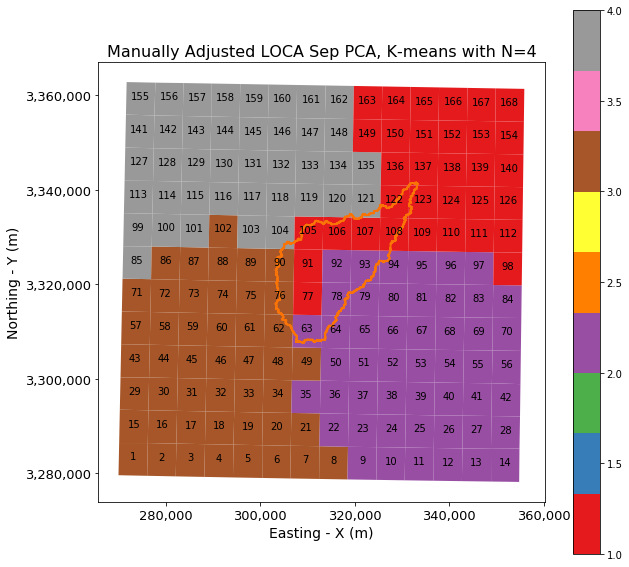

In [303]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOSepCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

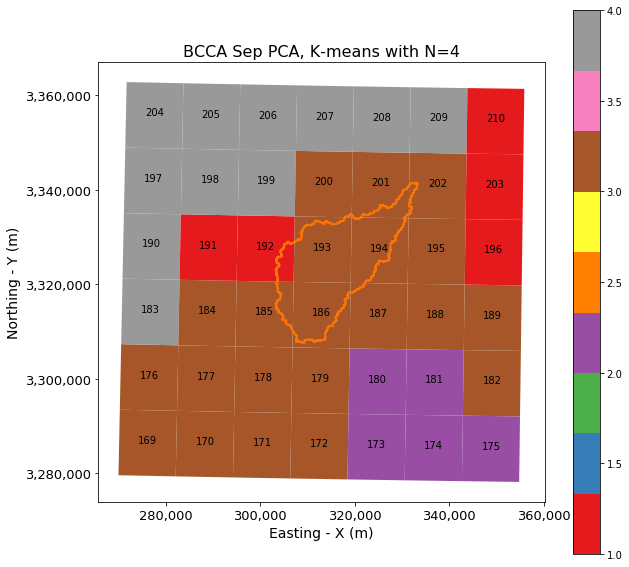

In [304]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCSepCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [305]:
gpdBCSepCluster.at[208:209, NColN] = 1
gpdBCSepCluster.at[201:202, NColN] = 1
gpdBCSepCluster.at[193:195, NColN] = 1
gpdBCSepCluster.at[200, NColN] = 4
gpdBCSepCluster.at[188:189, NColN] = 2
gpdBCSepCluster.at[182, NColN] = 2

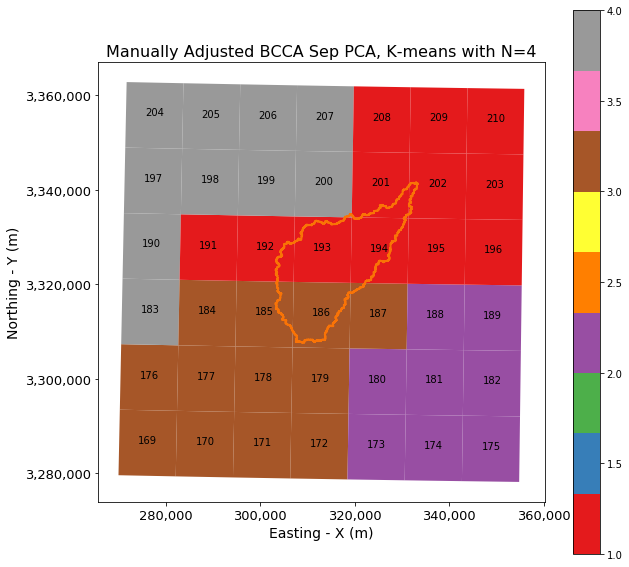

In [306]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCSepCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Sep PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [307]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOSepMergeDF = gpdLOSepCluster[MonthMergeCols].copy()

In [308]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCSepMergeDF = gpdBCSepCluster[MonthMergeCols].copy()

In [309]:
SepLOCompP = LOPtsMergeDF.merge( LOSepMergeDF, left_index=True, right_index=True )
SepBCCompP = BCPtsMergeDF.merge( BCSepMergeDF, left_index=True, right_index=True )

In [310]:
SepLOCompP.crs = UTMCRS
SepBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [311]:
PRregSep.drop( columns='Id', inplace=True )
PRregSep['PRegion_Id'] = PRregSep['Region_Id']
PRregSep.set_index( keys="Region_Id", inplace=True )

In [312]:
SepLOCompP["PRegion_Id"] = 5

In [313]:
display( HTML( PRregSep.head().to_html() ) )

In [314]:
SepLOCompP["Intersects"] = SepLOCompP.intersects( PRregSep.loc[1, 'geometry'] )
SepLOCompP.at[SepLOCompP["Intersects"], "PRegion_Id"] = 1
SepLOCompP["Intersects"] = SepLOCompP.intersects( PRregSep.loc[2, 'geometry'] )
SepLOCompP.at[SepLOCompP["Intersects"], "PRegion_Id"] = 2
SepLOCompP["Intersects"] = SepLOCompP.intersects( PRregSep.loc[3, 'geometry'] )
SepLOCompP.at[SepLOCompP["Intersects"], "PRegion_Id"] = 3
SepLOCompP["Intersects"] = SepLOCompP.intersects( PRregSep['geometry'].iat[3] )
SepLOCompP.at[SepLOCompP["Intersects"], "PRegion_Id"] = 4
SepLOCompP["Intersects"] = SepLOCompP.intersects( PRregSep['geometry'].iat[4] )
SepLOCompP.at[SepLOCompP["Intersects"], "PRegion_Id"] = 4

In [315]:
SepLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.386905    2.553571    3.857143
std      3.462373    4.04318    1.198430    1.059652    1.296175
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    0.000000    2.000000    3.000000
50%      5.500000    6.50000    1.000000    3.000000    4.000000
75%      8.250000   10.00000    3.000000    3.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [316]:
SepBCCompP["PRegion_Id"] = 5

In [317]:
SepBCCompP["Intersects"] = SepBCCompP.intersects( PRregSep.loc[1, 'geometry'] )
SepBCCompP.at[SepBCCompP["Intersects"], "PRegion_Id"] = 1
SepBCCompP["Intersects"] = SepBCCompP.intersects( PRregSep.loc[2, 'geometry'] )
SepBCCompP.at[SepBCCompP["Intersects"], "PRegion_Id"] = 2
SepBCCompP["Intersects"] = SepBCCompP.intersects( PRregSep.loc[3, 'geometry'] )
SepBCCompP.at[SepBCCompP["Intersects"], "PRegion_Id"] = 3
SepBCCompP["Intersects"] = SepBCCompP.intersects( PRregSep['geometry'].iat[3] )
SepBCCompP.at[SepBCCompP["Intersects"], "PRegion_Id"] = 4
SepBCCompP["Intersects"] = SepBCCompP.intersects( PRregSep['geometry'].iat[4] )
SepBCCompP.at[SepBCCompP["Intersects"], "PRegion_Id"] = 4

In [318]:
SepBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.142857   2.476190    4.142857
std     1.728527   2.024243   1.298619   1.152687    1.279699
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   0.000000   1.000000    3.250000
50%     2.500000   3.000000   0.500000   3.000000    5.000000
75%     4.000000   5.000000   2.750000   3.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [319]:
gpdLOSepCluster["PRegion_Id"] = np.array( SepLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCSepCluster["PRegion_Id"] = np.array( SepBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

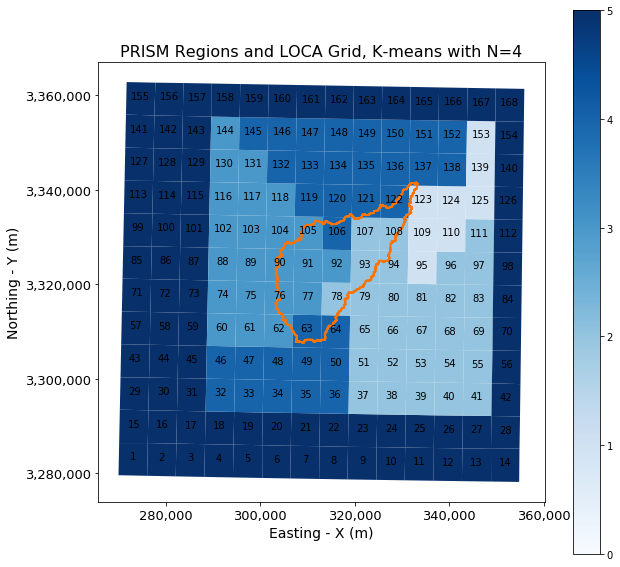

In [320]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOSepCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

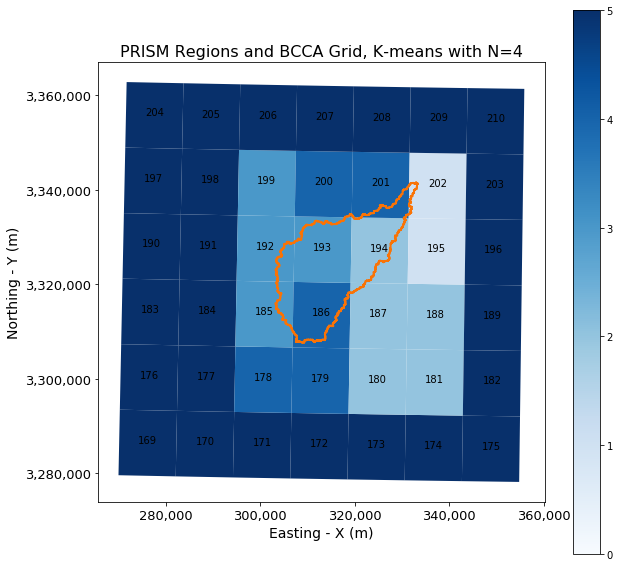

In [321]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCSepCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCSepCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

In [322]:
gpdLOOctCluster[NColN] = gpdLOOctCluster[KeepCols[0]]
gpdLOOctCluster[NamCoord] = gpdLOOctCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [323]:
gpdLOOctCluster['Grid_Id'] = gpdLOOctCluster.index + 1

In [324]:
gpdLOOctCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLOOctCluster.sort_index( axis=0, ascending=True, inplace=True )

In [325]:
display( HTML( gpdLOOctCluster.head().to_html() ) )

In [326]:
gpdBCOctCluster[NColN] = gpdBCOctCluster[KeepCols[0]]
gpdBCOctCluster[NamCoord] = gpdBCOctCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [327]:
gpdBCOctCluster['Grid_Id'] = gpdBCOctCluster.index + BCCA_START

In [328]:
gpdBCOctCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCOctCluster.sort_index( axis=0, ascending=True, inplace=True )

In [329]:
display( HTML( gpdBCOctCluster.head().to_html() ) )

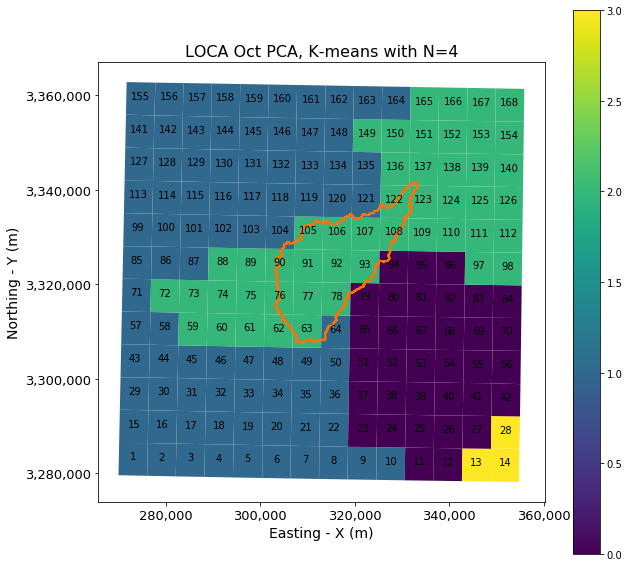

In [330]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOOctCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLOOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

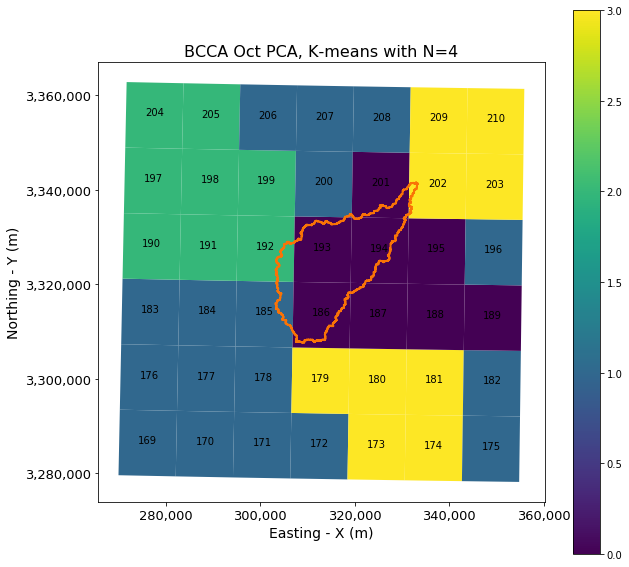

In [331]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCOctCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [332]:
LOMapDict = { 2 : 1,
              3 : 2,
              0 : 3,
              1 : 4 }
BCMapDict = { 3 : 1,
              0 : 2,
              1 : 3,
              2 : 4
}

In [333]:
gpdLOOctCluster[NColN] = gpdLOOctCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCOctCluster[NColN] = gpdBCOctCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

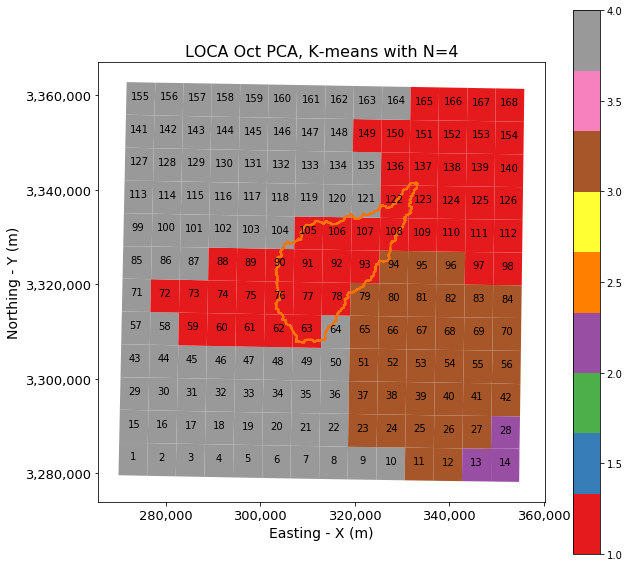

In [334]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOOctCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [335]:
#gpdLOOctCluster.at[155, NColN] = 4
#gpdLOOctCluster.at[116, NColN] = 4
#gpdLOOctCluster.at[117, NColN] = 4
#gpdLOOctCluster.at[114, NColN] = 4

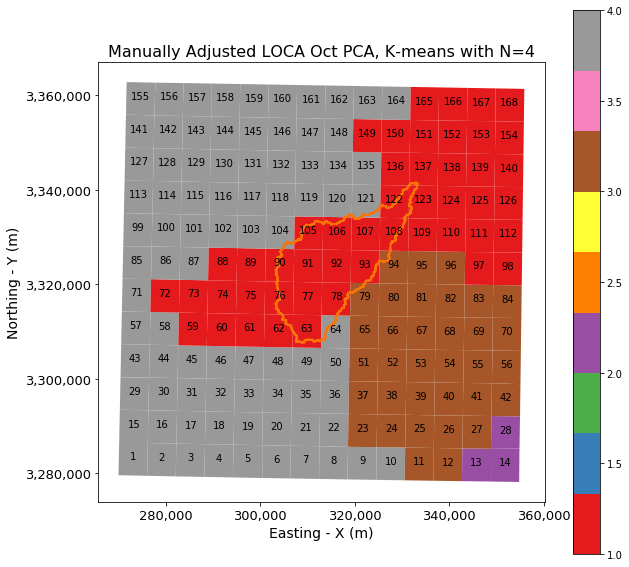

In [336]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOOctCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLOOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

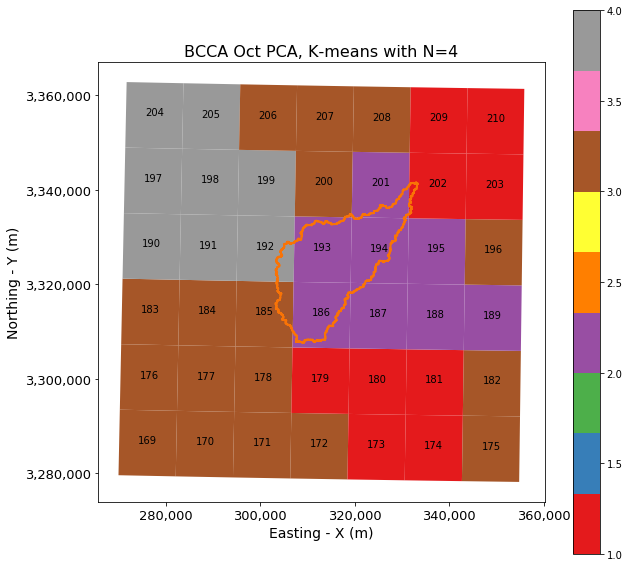

In [337]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCOctCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [338]:
gpdBCOctCluster.at[196, NColN] = 2
gpdBCOctCluster.at[179:182, NColN] = 2
gpdBCOctCluster.at[173:175, NColN] = 2
gpdBCOctCluster.at[206:208, NColN] = 4
gpdBCOctCluster.at[200, NColN] = 4

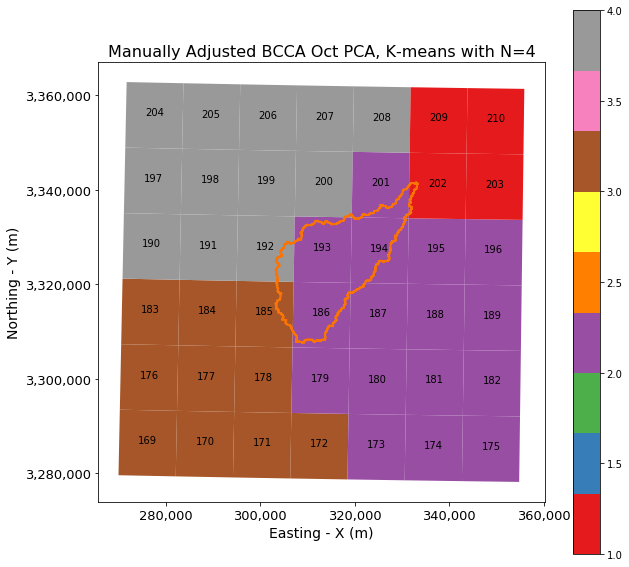

In [339]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCOctCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Oct PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [340]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LOOctMergeDF = gpdLOOctCluster[MonthMergeCols].copy()

In [341]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCOctMergeDF = gpdBCOctCluster[MonthMergeCols].copy()

In [342]:
OctLOCompP = LOPtsMergeDF.merge( LOOctMergeDF, left_index=True, right_index=True )
OctBCCompP = BCPtsMergeDF.merge( BCOctMergeDF, left_index=True, right_index=True )

In [343]:
OctLOCompP.crs = UTMCRS
OctBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [344]:
PRregOct.drop( columns='Id', inplace=True )
PRregOct['PRegion_Id'] = PRregOct['Region_Id']
PRregOct.set_index( keys="Region_Id", inplace=True )

In [345]:
OctLOCompP["PRegion_Id"] = 5

In [346]:
OctLOCompP["Intersects"] = OctLOCompP.intersects( PRregOct.loc[1, 'geometry'] )
OctLOCompP.at[OctLOCompP["Intersects"], "PRegion_Id"] = 1
OctLOCompP["Intersects"] = OctLOCompP.intersects( PRregOct.loc[2, 'geometry'] )
OctLOCompP.at[OctLOCompP["Intersects"], "PRegion_Id"] = 2
OctLOCompP["Intersects"] = OctLOCompP.intersects( PRregOct.loc[3, 'geometry'] )
OctLOCompP.at[OctLOCompP["Intersects"], "PRegion_Id"] = 3
OctLOCompP["Intersects"] = OctLOCompP.intersects( PRregOct.loc[4, 'geometry'] )
OctLOCompP.at[OctLOCompP["Intersects"], "PRegion_Id"] = 4

In [347]:
OctLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.119048    2.904762    3.571429
std      3.462373    4.04318    0.740687    1.286680    1.565234
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    1.000000    2.000000
50%      5.500000    6.50000    1.000000    3.000000    4.000000
75%      8.250000   10.00000    2.000000    4.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [348]:
OctBCCompP["PRegion_Id"] = 5

In [349]:
OctBCCompP["Intersects"] = OctBCCompP.intersects( PRregOct.loc[1, 'geometry'] )
OctBCCompP.at[OctBCCompP["Intersects"], "PRegion_Id"] = 1
OctBCCompP["Intersects"] = OctBCCompP.intersects( PRregOct.loc[2, 'geometry'] )
OctBCCompP.at[OctBCCompP["Intersects"], "PRegion_Id"] = 2
OctBCCompP["Intersects"] = OctBCCompP.intersects( PRregOct.loc[3, 'geometry'] )
OctBCCompP.at[OctBCCompP["Intersects"], "PRegion_Id"] = 3
OctBCCompP["Intersects"] = OctBCCompP.intersects( PRregOct.loc[4, 'geometry'] )
OctBCCompP.at[OctBCCompP["Intersects"], "PRegion_Id"] = 4

In [350]:
OctBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.428571   2.714286    4.000000
std     1.728527   2.024243   1.039298   0.994760    1.448296
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   1.000000   2.000000    3.000000
50%     2.500000   3.000000   1.000000   3.000000    5.000000
75%     4.000000   5.000000   2.000000   4.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [351]:
gpdLOOctCluster["PRegion_Id"] = np.array( OctLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCOctCluster["PRegion_Id"] = np.array( OctBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

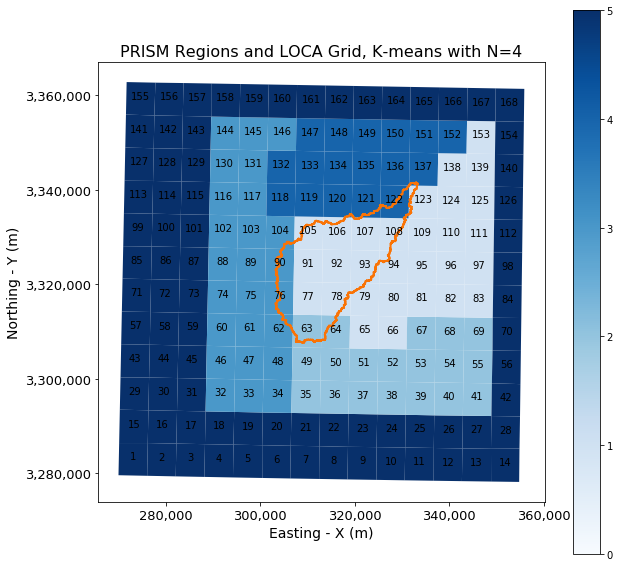

In [352]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLOOctCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLOOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

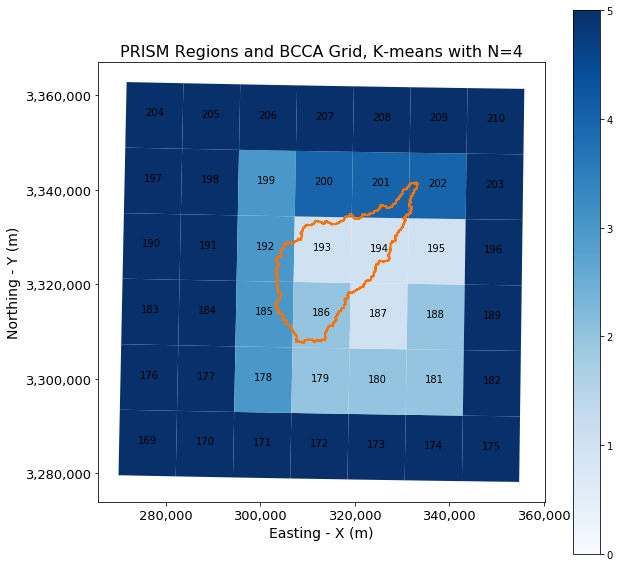

In [353]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCOctCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCOctCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

In [354]:
gpdLONovCluster[NColN] = gpdLONovCluster[KeepCols[0]]
gpdLONovCluster[NamCoord] = gpdLONovCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [355]:
gpdLONovCluster['Grid_Id'] = gpdLONovCluster.index + 1

In [356]:
gpdLONovCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLONovCluster.sort_index( axis=0, ascending=True, inplace=True )

In [357]:
display( HTML( gpdLONovCluster.head().to_html() ) )

In [358]:
gpdBCNovCluster[NColN] = gpdBCNovCluster[KeepCols[0]]
gpdBCNovCluster[NamCoord] = gpdBCNovCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [359]:
gpdBCNovCluster['Grid_Id'] = gpdBCNovCluster.index + BCCA_START

In [360]:
gpdBCNovCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCNovCluster.sort_index( axis=0, ascending=True, inplace=True )

In [361]:
display( HTML( gpdBCNovCluster.head().to_html() ) )

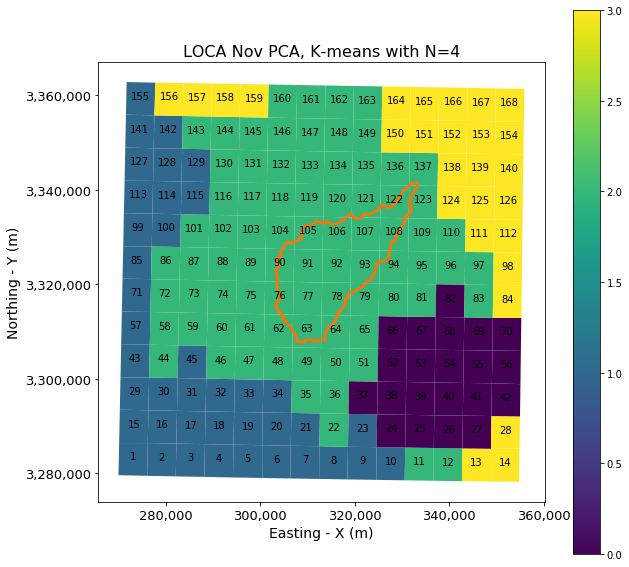

In [362]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLONovCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLONovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

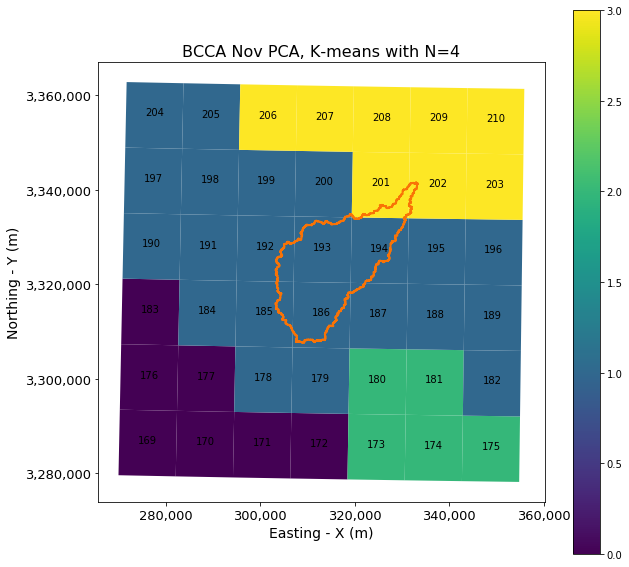

In [363]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCNovCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [364]:
LOMapDict = { 3 : 1,
              0 : 2,
              1 : 3,
              2 : 4 }
BCMapDict = { 3 : 1,
              2 : 2,
              0 : 3,
              1 : 4
}

In [365]:
gpdLONovCluster[NColN] = gpdLONovCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCNovCluster[NColN] = gpdBCNovCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

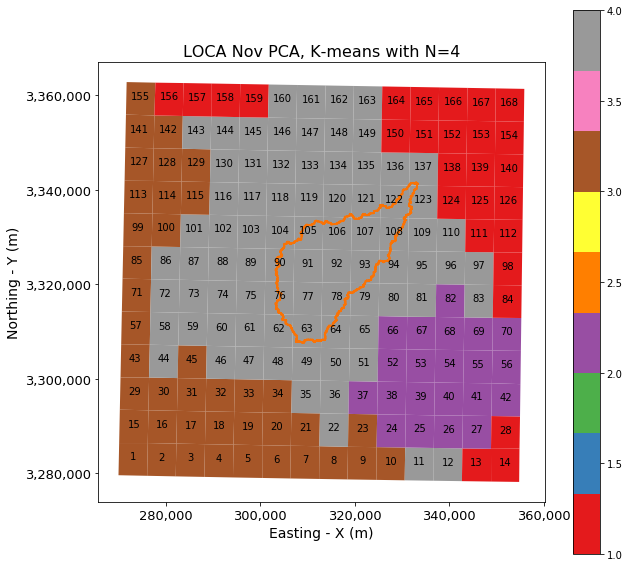

In [366]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLONovCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLONovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [367]:
gpdLONovCluster.at[28, NColN] = 2
gpdLONovCluster.at[23, NColN] = 2
gpdLONovCluster.at[9:14, NColN] = 2
gpdLONovCluster.at[155:159, NColN] = 4

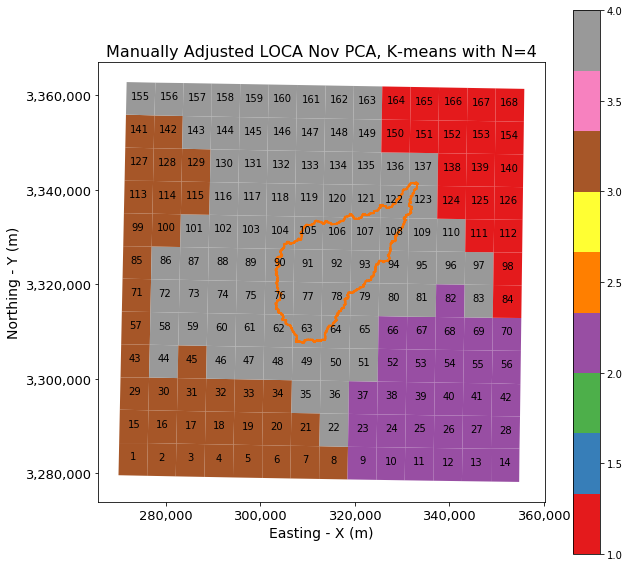

In [368]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLONovCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLONovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

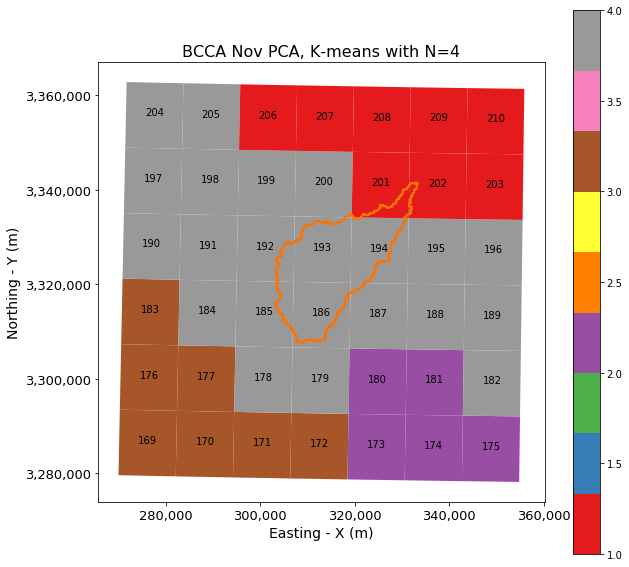

In [369]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCNovCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [370]:
#gpdBCNovCluster.at[175, NColN] = 2

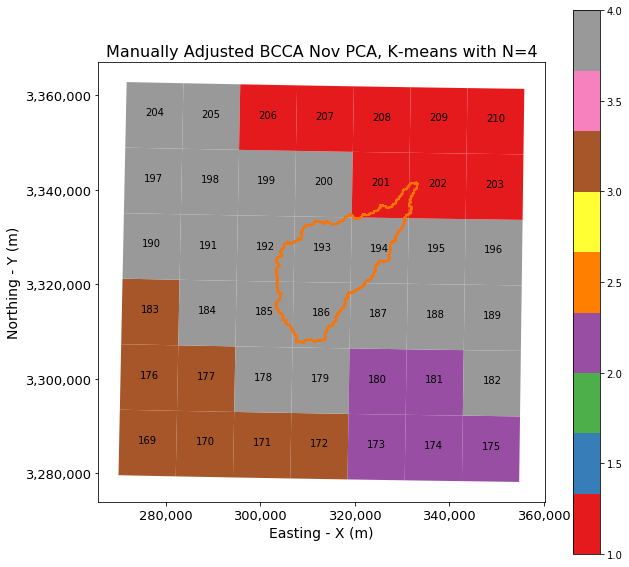

In [371]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCNovCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Nov PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [372]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LONovMergeDF = gpdLONovCluster[MonthMergeCols].copy()

In [373]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCNovMergeDF = gpdBCNovCluster[MonthMergeCols].copy()

In [374]:
NovLOCompP = LOPtsMergeDF.merge( LONovMergeDF, left_index=True, right_index=True )
NovBCCompP = BCPtsMergeDF.merge( BCNovMergeDF, left_index=True, right_index=True )

In [375]:
NovLOCompP.crs = UTMCRS
NovBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [376]:
PRregNov.drop( columns='Id', inplace=True )
PRregNov['PRegion_Id'] = PRregNov['Region_Id']
PRregNov.set_index( keys="Region_Id", inplace=True )

In [377]:
NovLOCompP["PRegion_Id"] = 5

In [378]:
NovLOCompP["Intersects"] = NovLOCompP.intersects( PRregNov.loc[1, 'geometry'] )
NovLOCompP.at[NovLOCompP["Intersects"], "PRegion_Id"] = 1
NovLOCompP["Intersects"] = NovLOCompP.intersects( PRregNov.loc[2, 'geometry'] )
NovLOCompP.at[NovLOCompP["Intersects"], "PRegion_Id"] = 2
NovLOCompP["Intersects"] = NovLOCompP.intersects( PRregNov.loc[3, 'geometry'] )
NovLOCompP.at[NovLOCompP["Intersects"], "PRegion_Id"] = 3
NovLOCompP["Intersects"] = NovLOCompP.intersects( PRregNov.loc[4, 'geometry'] )
NovLOCompP.at[NovLOCompP["Intersects"], "PRegion_Id"] = 4

In [379]:
NovLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.672619    3.083333    3.440476
std      3.462373    4.04318    0.892397    1.068978    1.680114
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    2.000000    2.000000
50%      5.500000    6.50000    2.000000    3.000000    4.000000
75%      8.250000   10.00000    2.000000    4.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [380]:
NovBCCompP["PRegion_Id"] = 5

In [381]:
NovBCCompP["Intersects"] = NovBCCompP.intersects( PRregNov.loc[1, 'geometry'] )
NovBCCompP.at[NovBCCompP["Intersects"], "PRegion_Id"] = 1
NovBCCompP["Intersects"] = NovBCCompP.intersects( PRregNov.loc[2, 'geometry'] )
NovBCCompP.at[NovBCCompP["Intersects"], "PRegion_Id"] = 2
NovBCCompP["Intersects"] = NovBCCompP.intersects( PRregNov.loc[3, 'geometry'] )
NovBCCompP.at[NovBCCompP["Intersects"], "PRegion_Id"] = 3
NovBCCompP["Intersects"] = NovBCCompP.intersects( PRregNov.loc[4, 'geometry'] )
NovBCCompP.at[NovBCCompP["Intersects"], "PRegion_Id"] = 4

In [382]:
NovBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.333333   3.023810    3.952381
std     1.728527   2.024243   0.979464   1.199351    1.529425
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   1.000000   2.000000    3.000000
50%     2.500000   3.000000   1.000000   4.000000    5.000000
75%     4.000000   5.000000   2.000000   4.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [383]:
gpdLONovCluster["PRegion_Id"] = np.array( NovLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCNovCluster["PRegion_Id"] = np.array( NovBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

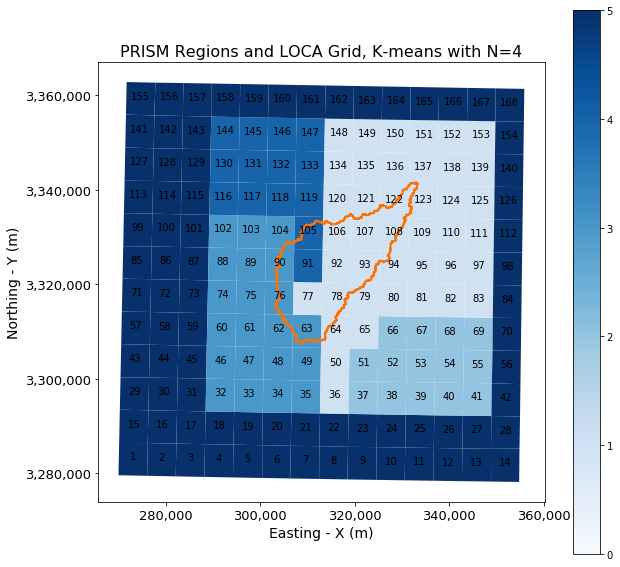

In [384]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLONovCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLONovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

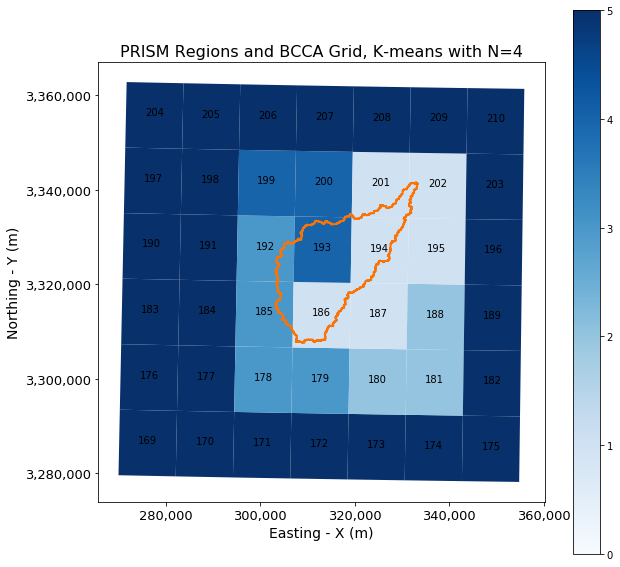

In [385]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCNovCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCNovCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

In [386]:
gpdLODecCluster[NColN] = gpdLODecCluster[KeepCols[0]]
gpdLODecCluster[NamCoord] = gpdLODecCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [387]:
gpdLODecCluster['Grid_Id'] = gpdLODecCluster.index + 1

In [388]:
gpdLODecCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdLODecCluster.sort_index( axis=0, ascending=True, inplace=True )

In [389]:
display( HTML( gpdLODecCluster.head().to_html() ) )

In [390]:
gpdBCDecCluster[NColN] = gpdBCDecCluster[KeepCols[0]]
gpdBCDecCluster[NamCoord] = gpdBCDecCluster['geometry'].apply(lambda x: 
                                        x.representative_point().coords[:] )

In [391]:
gpdBCDecCluster['Grid_Id'] = gpdBCDecCluster.index + BCCA_START

In [392]:
gpdBCDecCluster.set_index( keys="Grid_Id", drop=True, inplace=True, verify_integrity=True )
gpdBCDecCluster.sort_index( axis=0, ascending=True, inplace=True )

In [393]:
display( HTML( gpdBCDecCluster.head().to_html() ) )

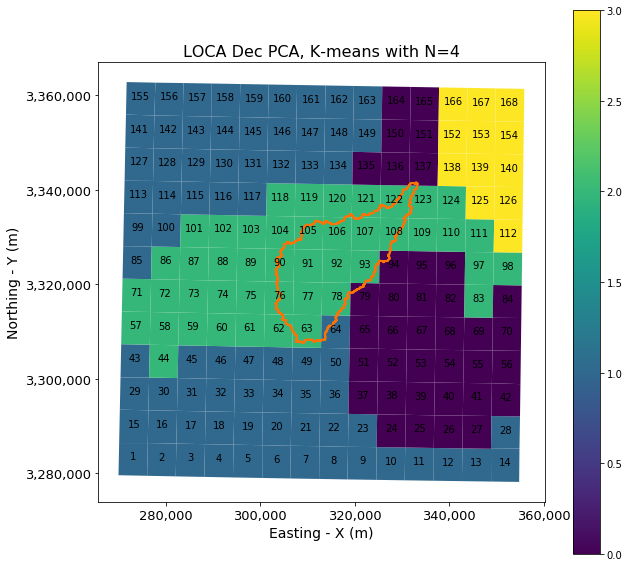

In [394]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLODecCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdLODecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

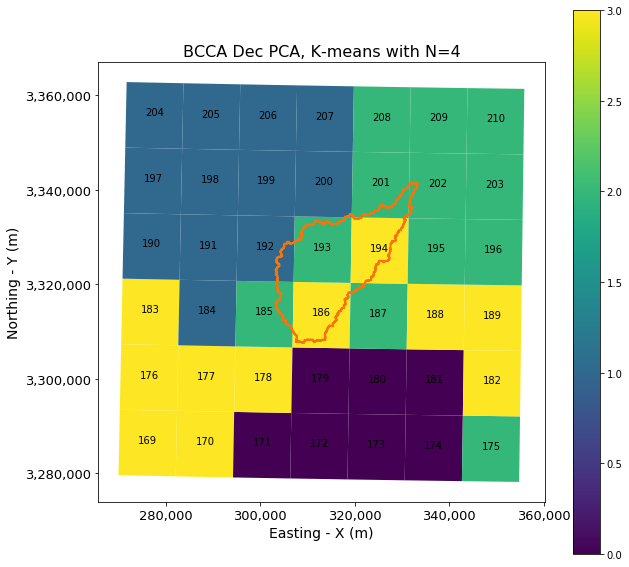

In [395]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCDecCluster.plot(column=KeepCols[0], ax=ax11, legend=True )
# now label
for idx, row in gpdBCDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [396]:
LOMapDict = { 3 : 1,
              2 : 2,
              0 : 3,
              1 : 4 }
BCMapDict = { 2 : 1,
              0 : 2,
              3 : 3,
              1 : 4
}

In [397]:
gpdLODecCluster[NColN] = gpdLODecCluster.apply( lambda row: LOReplLam(row[KeepCols[0]]), axis=1 )
gpdBCDecCluster[NColN] = gpdBCDecCluster.apply( lambda row: BCReplLam(row[KeepCols[0]]), axis=1 )

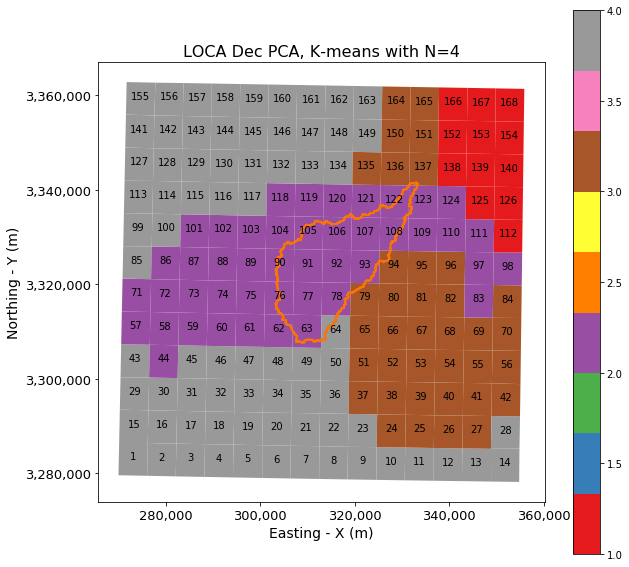

In [398]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLODecCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLODecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("LOCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [399]:
gpdLODecCluster.at[164:165, NColN] = 1
gpdLODecCluster.at[150:151, NColN] = 1
gpdLODecCluster.at[135:137, NColN] = 1
gpdLODecCluster.at[9:14, NColN] = 3
gpdLODecCluster.at[23, NColN] = 3
gpdLODecCluster.at[28, NColN] = 3

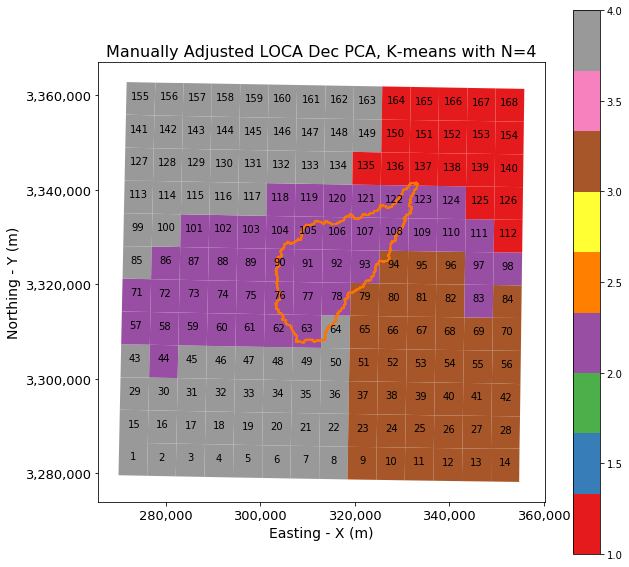

In [400]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLODecCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdLODecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted LOCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

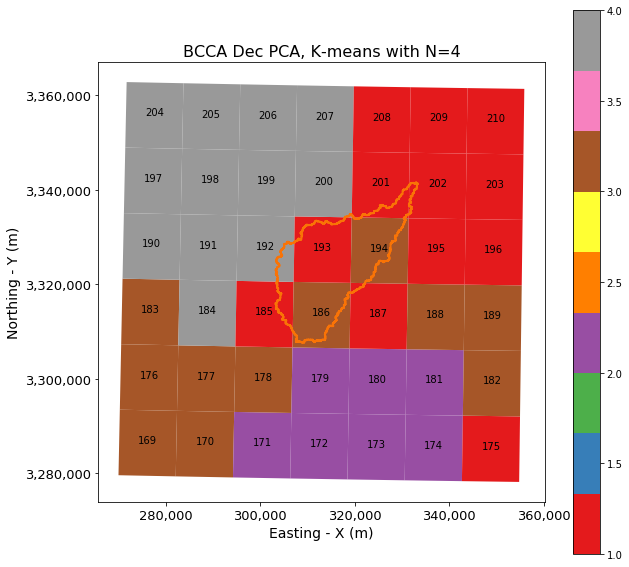

In [401]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCDecCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("BCCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [402]:
gpdBCDecCluster.at[194, NColN] = 1
gpdBCDecCluster.at[187:189, NColN] = 2
gpdBCDecCluster.at[182, NColN] = 2
gpdBCDecCluster.at[175, NColN] = 2
gpdBCDecCluster.at[185, NColN] = 3

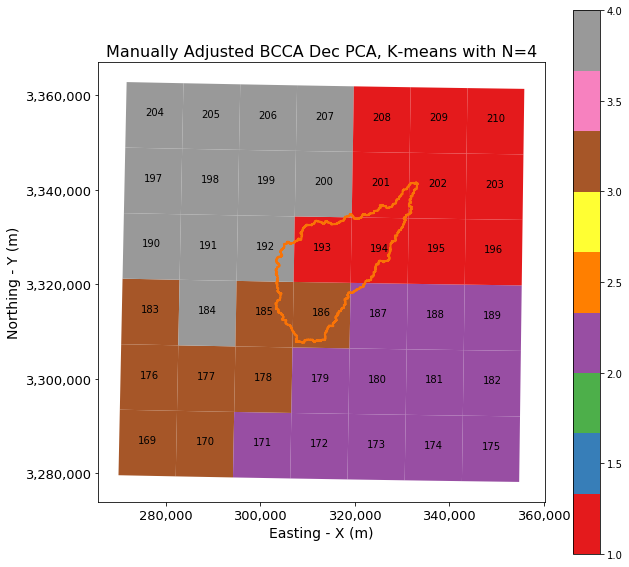

In [403]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCDecCluster.plot(column=NColN, ax=ax11, cmap='Set1', legend=True )
# now label
for idx, row in gpdBCDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("Manually Adjusted BCCA Dec PCA, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

Next need to join the current regions to the point geometries for intersection with PRISM

In [404]:
LOPtsMergeDF = LOGPTS[PtsMergeCols].copy()
LODecMergeDF = gpdLODecCluster[MonthMergeCols].copy()

In [405]:
BCPtsMergeDF = BCGPTS[PtsMergeCols].copy()
BCDecMergeDF = gpdBCDecCluster[MonthMergeCols].copy()

In [406]:
DecLOCompP = LOPtsMergeDF.merge( LODecMergeDF, left_index=True, right_index=True )
DecBCCompP = BCPtsMergeDF.merge( BCDecMergeDF, left_index=True, right_index=True )

In [407]:
DecLOCompP.crs = UTMCRS
DecBCCompP.crs = UTMCRS

Now we need to compare this with the PRISM delineation and see if we can use that for all - go through and use intersection with the PRISM polygons to determine the corresponding PRISM region for each BCCA and LOCA grid location.

Note that "PRegion_Id" value of 5 means that the grid point is outside of the extracted PRISM grid cell area.

In [408]:
PRregDec.drop( columns='Id', inplace=True )
PRregDec['PRegion_Id'] = PRregDec['Region_Id']
PRregDec.set_index( keys="Region_Id", inplace=True )

In [409]:
DecLOCompP["PRegion_Id"] = 5

In [410]:
DecLOCompP["Intersects"] = DecLOCompP.intersects( PRregDec.loc[1, 'geometry'] )
DecLOCompP.at[DecLOCompP["Intersects"], "PRegion_Id"] = 1
DecLOCompP["Intersects"] = DecLOCompP.intersects( PRregDec.loc[2, 'geometry'] )
DecLOCompP.at[DecLOCompP["Intersects"], "PRegion_Id"] = 2
DecLOCompP["Intersects"] = DecLOCompP.intersects( PRregDec.loc[3, 'geometry'] )
DecLOCompP.at[DecLOCompP["Intersects"], "PRegion_Id"] = 3
DecLOCompP["Intersects"] = DecLOCompP.intersects( PRregDec.loc[4, 'geometry'] )
DecLOCompP.at[DecLOCompP["Intersects"], "PRegion_Id"] = 4

In [411]:
DecLOCompP.describe()

Row        Col   K-Means_4   Region_Id  PRegion_Id
count  168.000000  168.00000  168.000000  168.000000  168.000000
mean     5.500000    6.50000    1.190476    2.898810    3.750000
std      3.462373    4.04318    0.861362    1.053309    1.404654
min      0.000000    0.00000    0.000000    1.000000    1.000000
25%      2.750000    3.00000    1.000000    2.000000    3.000000
50%      5.500000    6.50000    1.000000    3.000000    4.000000
75%      8.250000   10.00000    2.000000    4.000000    5.000000
max     11.000000   13.00000    3.000000    4.000000    5.000000

In [412]:
DecBCCompP["PRegion_Id"] = 5

In [413]:
DecBCCompP["Intersects"] = DecBCCompP.intersects( PRregDec.loc[1, 'geometry'] )
DecBCCompP.at[DecBCCompP["Intersects"], "PRegion_Id"] = 1
DecBCCompP["Intersects"] = DecBCCompP.intersects( PRregDec.loc[2, 'geometry'] )
DecBCCompP.at[DecBCCompP["Intersects"], "PRegion_Id"] = 2
DecBCCompP["Intersects"] = DecBCCompP.intersects( PRregDec.loc[3, 'geometry'] )
DecBCCompP.at[DecBCCompP["Intersects"], "PRegion_Id"] = 3
DecBCCompP["Intersects"] = DecBCCompP.intersects( PRregDec.loc[4, 'geometry'] )
DecBCCompP.at[DecBCCompP["Intersects"], "PRegion_Id"] = 4

In [414]:
DecBCCompP.describe()

Row        Col  K-Means_4  Region_Id  PRegion_Id
count  42.000000  42.000000  42.000000  42.000000   42.000000
mean    2.500000   3.000000   1.642857   2.523810    4.190476
std     1.728527   2.024243   1.055102   1.152687    1.254030
min     0.000000   0.000000   0.000000   1.000000    1.000000
25%     1.000000   1.000000   1.000000   2.000000    3.000000
50%     2.500000   3.000000   2.000000   2.000000    5.000000
75%     4.000000   5.000000   2.750000   4.000000    5.000000
max     5.000000   6.000000   3.000000   4.000000    5.000000

Now need to add the PRISM region back into our geodataframe so that have it for the future.

In [415]:
gpdLODecCluster["PRegion_Id"] = np.array( DecLOCompP["PRegion_Id"], dtype=np.int32 )
gpdBCDecCluster["PRegion_Id"] = np.array( DecBCCompP["PRegion_Id"], dtype=np.int32 )

Now plot our completely edited cluster arrangement

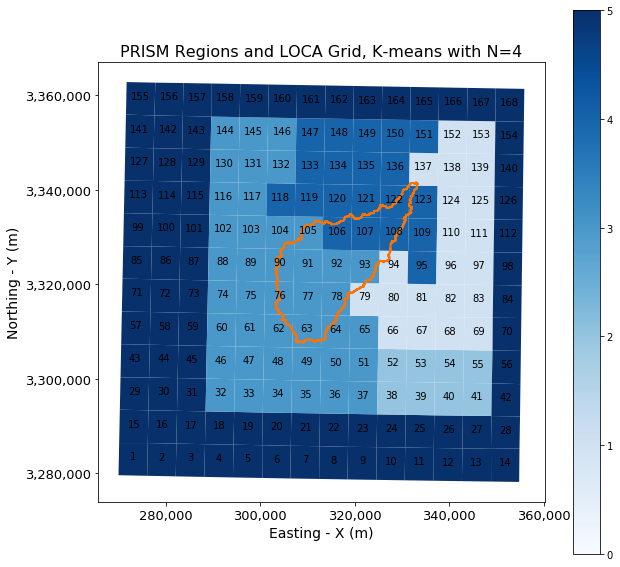

In [416]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdLODecCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdLODecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and LOCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

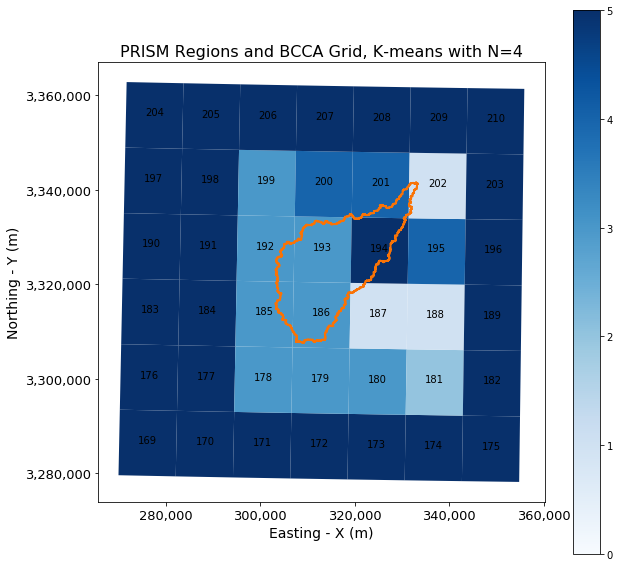

In [417]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 10.0)
ax11 = Fig1.add_subplot(111)
gpdBCDecCluster.plot(column="PRegion_Id", ax=ax11, cmap='Blues', vmin=0.0, vmax=5.0, legend=True )
# now label
for idx, row in gpdBCDecCluster.iterrows():
    ax11.annotate(s="%d" % idx, xy=row[NamCoord][0], horizontalalignment='center')
DCWS.plot( ax=ax11, facecolor='none', edgecolor='xkcd:orange', linewidth=2, label="Watershed" )
ax11.set_title("PRISM Regions and BCCA Grid, K-means with N=4", fontsize=16 )
ax11.set_xlabel('Easting - X (m)', fontsize=14 )
ax11.set_ylabel('Northing - Y (m)', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Output Results and Prepare for R

Next, prepare an output array for each month to be used in R analysis. To do this, add the *Region_Id* from the cluster clean-up to the existing precipitation depth by grid cell.

### Jan

In [419]:
display( HTML( gpdLOJanCluster.head().to_html() ) )

In [420]:
display( HTML( gpdBCJanCluster.head().to_html() ) )

In [421]:
gpdLOJanCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jan_LOCA_ClustRegions.shp" ) )
gpdLOJanCluster.to_file( OutShp )

In [423]:
display( HTML( gpdLOJanCluster.head().to_html() ) )

In [424]:
gpdBCJanCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jan_BCCA_ClustRegions.shp" ) )
gpdBCJanCluster.to_file( OutShp )

In [425]:
JoinCols = [ "Region_Id", "PRegion_Id"]

In [426]:
JanPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDep_CMIP5_1981-2010.pickle" ) )
JanDF = pd.read_pickle( JanPCKF )

In [427]:
display( HTML( JanDF.head().to_html() ) )

In [428]:
JanLOGroupDF = JanDF.merge( gpdLOJanCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [429]:
display( HTML( JanLOGroupDF.head().to_html() ) )

In [430]:
JanBCGroupDF = JanDF.merge( gpdBCJanCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [431]:
display( HTML( JanBCGroupDF.head().to_html() ) )

In [432]:
JanPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_LOCA_Grp_1981-2010.pickle" ) )
JanLOGroupDF.to_pickle( JanPCKF )
JanFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_LOCA_Grp_1981-2010.feather" ) )
JanLOGroupDF.reset_index( inplace=True )
JanLOGroupDF.to_feather( JanFeatherF )
JanPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_BCCA_Grp_1981-2010.pickle" ) )
JanBCGroupDF.to_pickle( JanPCKF )
JanFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jan_WetDays_BCCA_Grp_1981-2010.feather" ) )
JanBCGroupDF.reset_index( inplace=True )
JanBCGroupDF.to_feather( JanFeatherF )

### Feb

In [433]:
gpdLOFebCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Feb_LOCA_ClustRegions.shp" ) )
gpdLOFebCluster.to_file( OutShp )

In [434]:
gpdBCFebCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Feb_BCCA_ClustRegions.shp" ) )
gpdBCFebCluster.to_file( OutShp )

In [435]:
FebPCKF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDep_CMIP5_1981-2010.pickle" ) )
FebDF = pd.read_pickle( FebPCKF )

In [436]:
FebLOGroupDF = FebDF.merge( gpdLOFebCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [437]:
FebBCGroupDF = FebDF.merge( gpdBCFebCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [438]:
FebPCKF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_LOCA_Grp_1981-2010.pickle" ) )
FebLOGroupDF.to_pickle( FebPCKF )
FebFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_LOCA_Grp_1981-2010.feather" ) )
FebLOGroupDF.reset_index( inplace=True )
FebLOGroupDF.to_feather( FebFeatherF )
FebPCKF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_BCCA_Grp_1981-2010.pickle" ) )
FebBCGroupDF.to_pickle( FebPCKF )
FebFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Feb_WetDays_BCCA_Grp_1981-2010.feather" ) )
FebBCGroupDF.reset_index( inplace=True )
FebBCGroupDF.to_feather( FebFeatherF )

### Mar

In [439]:
gpdLOMarCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Mar_LOCA_ClustRegions.shp" ) )
gpdLOMarCluster.to_file( OutShp )

In [440]:
gpdBCMarCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Mar_BCCA_ClustRegions.shp" ) )
gpdBCMarCluster.to_file( OutShp )

In [441]:
MarPCKF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDep_CMIP5_1981-2010.pickle" ) )
MarDF = pd.read_pickle( MarPCKF )

In [442]:
MarLOGroupDF = MarDF.merge( gpdLOMarCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [443]:
MarBCGroupDF = MarDF.merge( gpdBCMarCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [444]:
MarPCKF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_LOCA_Grp_1981-2010.pickle" ) )
MarLOGroupDF.to_pickle( MarPCKF )
MarFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_LOCA_Grp_1981-2010.feather" ) )
MarLOGroupDF.reset_index( inplace=True )
MarLOGroupDF.to_feather( MarFeatherF )
MarPCKF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_BCCA_Grp_1981-2010.pickle" ) )
MarBCGroupDF.to_pickle( MarPCKF )
MarFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Mar_WetDays_BCCA_Grp_1981-2010.feather" ) )
MarBCGroupDF.reset_index( inplace=True )
MarBCGroupDF.to_feather( MarFeatherF )

### Apr

In [445]:
gpdLOAprCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Apr_LOCA_ClustRegions.shp" ) )
gpdLOAprCluster.to_file( OutShp )

In [446]:
gpdBCAprCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Apr_BCCA_ClustRegions.shp" ) )
gpdBCAprCluster.to_file( OutShp )

In [447]:
AprPCKF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDep_CMIP5_1981-2010.pickle" ) )
AprDF = pd.read_pickle( AprPCKF )

In [448]:
AprLOGroupDF = AprDF.merge( gpdLOAprCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [449]:
AprBCGroupDF = AprDF.merge( gpdBCAprCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [450]:
AprPCKF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_LOCA_Grp_1981-2010.pickle" ) )
AprLOGroupDF.to_pickle( AprPCKF )
AprFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_LOCA_Grp_1981-2010.feather" ) )
AprLOGroupDF.reset_index( inplace=True )
AprLOGroupDF.to_feather( AprFeatherF )
AprPCKF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_BCCA_Grp_1981-2010.pickle" ) )
AprBCGroupDF.to_pickle( AprPCKF )
AprFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Apr_WetDays_BCCA_Grp_1981-2010.feather" ) )
AprBCGroupDF.reset_index( inplace=True )
AprBCGroupDF.to_feather( AprFeatherF )

### May

In [451]:
gpdLOMayCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "May_LOCA_ClustRegions.shp" ) )
gpdLOMayCluster.to_file( OutShp )

In [452]:
gpdBCMayCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "May_BCCA_ClustRegions.shp" ) )
gpdBCMayCluster.to_file( OutShp )

In [453]:
MayPCKF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDep_CMIP5_1981-2010.pickle" ) )
MayDF = pd.read_pickle( MayPCKF )

In [454]:
MayLOGroupDF = MayDF.merge( gpdLOMayCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [455]:
MayBCGroupDF = MayDF.merge( gpdBCMayCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [456]:
MayPCKF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_LOCA_Grp_1981-2010.pickle" ) )
MayLOGroupDF.to_pickle( MayPCKF )
MayFeatherF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_LOCA_Grp_1981-2010.feather" ) )
MayLOGroupDF.reset_index( inplace=True )
MayLOGroupDF.to_feather( MayFeatherF )
MayPCKF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_BCCA_Grp_1981-2010.pickle" ) )
MayBCGroupDF.to_pickle( MayPCKF )
MayFeatherF = os.path.normpath( os.path.join( IN_DIR2, "May_WetDays_BCCA_Grp_1981-2010.feather" ) )
MayBCGroupDF.reset_index( inplace=True )
MayBCGroupDF.to_feather( MayFeatherF )

### Jun

In [457]:
gpdLOJunCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jun_LOCA_ClustRegions.shp" ) )
gpdLOJunCluster.to_file( OutShp )

In [458]:
gpdBCJunCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jun_BCCA_ClustRegions.shp" ) )
gpdBCJunCluster.to_file( OutShp )

In [459]:
JunPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDep_CMIP5_1981-2010.pickle" ) )
JunDF = pd.read_pickle( JunPCKF )

In [460]:
JunLOGroupDF = JunDF.merge( gpdLOJunCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [461]:
JunBCGroupDF = JunDF.merge( gpdBCJunCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [462]:
JunPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_LOCA_Grp_1981-2010.pickle" ) )
JunLOGroupDF.to_pickle( JunPCKF )
JunFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_LOCA_Grp_1981-2010.feather" ) )
JunLOGroupDF.reset_index( inplace=True )
JunLOGroupDF.to_feather( JunFeatherF )
JunPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_BCCA_Grp_1981-2010.pickle" ) )
JunBCGroupDF.to_pickle( JunPCKF )
JunFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jun_WetDays_BCCA_Grp_1981-2010.feather" ) )
JunBCGroupDF.reset_index( inplace=True )
JunBCGroupDF.to_feather( JunFeatherF )

### Jul

In [463]:
gpdLOJulCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jul_LOCA_ClustRegions.shp" ) )
gpdLOJulCluster.to_file( OutShp )

In [464]:
gpdBCJulCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Jul_BCCA_ClustRegions.shp" ) )
gpdBCJulCluster.to_file( OutShp )

In [465]:
JulPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDep_CMIP5_1981-2010.pickle" ) )
JulDF = pd.read_pickle( JulPCKF )

In [466]:
JulLOGroupDF = JulDF.merge( gpdLOJulCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [467]:
JulBCGroupDF = JulDF.merge( gpdBCJulCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [468]:
JulPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_LOCA_Grp_1981-2010.pickle" ) )
JulLOGroupDF.to_pickle( JulPCKF )
JulFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_LOCA_Grp_1981-2010.feather" ) )
JulLOGroupDF.reset_index( inplace=True )
JulLOGroupDF.to_feather( JulFeatherF )
JulPCKF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_BCCA_Grp_1981-2010.pickle" ) )
JulBCGroupDF.to_pickle( JulPCKF )
JulFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Jul_WetDays_BCCA_Grp_1981-2010.feather" ) )
JulBCGroupDF.reset_index( inplace=True )
JulBCGroupDF.to_feather( JulFeatherF )

### Aug

In [469]:
gpdLOAugCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Aug_LOCA_ClustRegions.shp" ) )
gpdLOAugCluster.to_file( OutShp )

In [470]:
gpdBCAugCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Aug_BCCA_ClustRegions.shp" ) )
gpdBCAugCluster.to_file( OutShp )

In [471]:
AugPCKF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDep_CMIP5_1981-2010.pickle" ) )
AugDF = pd.read_pickle( AugPCKF )

In [472]:
AugLOGroupDF = AugDF.merge( gpdLOAugCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [473]:
AugBCGroupDF = AugDF.merge( gpdBCAugCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [474]:
AugPCKF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_LOCA_Grp_1981-2010.pickle" ) )
AugLOGroupDF.to_pickle( AugPCKF )
AugFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_LOCA_Grp_1981-2010.feather" ) )
AugLOGroupDF.reset_index( inplace=True )
AugLOGroupDF.to_feather( AugFeatherF )
AugPCKF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_BCCA_Grp_1981-2010.pickle" ) )
AugBCGroupDF.to_pickle( AugPCKF )
AugFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Aug_WetDays_BCCA_Grp_1981-2010.feather" ) )
AugBCGroupDF.reset_index( inplace=True )
AugBCGroupDF.to_feather( AugFeatherF )

### Sep

In [475]:
gpdLOSepCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Sep_LOCA_ClustRegions.shp" ) )
gpdLOSepCluster.to_file( OutShp )

In [476]:
gpdBCSepCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Sep_BCCA_ClustRegions.shp" ) )
gpdBCSepCluster.to_file( OutShp )

In [477]:
SepPCKF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDep_CMIP5_1981-2010.pickle" ) )
SepDF = pd.read_pickle( SepPCKF )

In [478]:
SepLOGroupDF = SepDF.merge( gpdLOSepCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [479]:
SepBCGroupDF = SepDF.merge( gpdBCSepCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [480]:
SepPCKF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_LOCA_Grp_1981-2010.pickle" ) )
SepLOGroupDF.to_pickle( SepPCKF )
SepFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_LOCA_Grp_1981-2010.feather" ) )
SepLOGroupDF.reset_index( inplace=True )
SepLOGroupDF.to_feather( SepFeatherF )
SepPCKF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_BCCA_Grp_1981-2010.pickle" ) )
SepBCGroupDF.to_pickle( SepPCKF )
SepFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Sep_WetDays_BCCA_Grp_1981-2010.feather" ) )
SepBCGroupDF.reset_index( inplace=True )
SepBCGroupDF.to_feather( SepFeatherF )

### Oct

In [481]:
gpdLOOctCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Oct_LOCA_ClustRegions.shp" ) )
gpdLOOctCluster.to_file( OutShp )

In [482]:
gpdBCOctCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Oct_BCCA_ClustRegions.shp" ) )
gpdBCOctCluster.to_file( OutShp )

In [483]:
OctPCKF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDep_CMIP5_1981-2010.pickle" ) )
OctDF = pd.read_pickle( OctPCKF )

In [484]:
OctLOGroupDF = OctDF.merge( gpdLOOctCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [485]:
OctBCGroupDF = OctDF.merge( gpdBCOctCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [486]:
OctPCKF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_LOCA_Grp_1981-2010.pickle" ) )
OctLOGroupDF.to_pickle( OctPCKF )
OctFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_LOCA_Grp_1981-2010.feather" ) )
OctLOGroupDF.reset_index( inplace=True )
OctLOGroupDF.to_feather( OctFeatherF )
OctPCKF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_BCCA_Grp_1981-2010.pickle" ) )
OctBCGroupDF.to_pickle( OctPCKF )
OctFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Oct_WetDays_BCCA_Grp_1981-2010.feather" ) )
OctBCGroupDF.reset_index( inplace=True )
OctBCGroupDF.to_feather( OctFeatherF )

### Nov

In [487]:
gpdLONovCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Nov_LOCA_ClustRegions.shp" ) )
gpdLONovCluster.to_file( OutShp )

In [488]:
gpdBCNovCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Nov_BCCA_ClustRegions.shp" ) )
gpdBCNovCluster.to_file( OutShp )

In [489]:
NovPCKF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDep_CMIP5_1981-2010.pickle" ) )
NovDF = pd.read_pickle( NovPCKF )

In [490]:
NovLOGroupDF = NovDF.merge( gpdLONovCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [491]:
NovBCGroupDF = NovDF.merge( gpdBCNovCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [492]:
NovPCKF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_LOCA_Grp_1981-2010.pickle" ) )
NovLOGroupDF.to_pickle( NovPCKF )
NovFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_LOCA_Grp_1981-2010.feather" ) )
NovLOGroupDF.reset_index( inplace=True )
NovLOGroupDF.to_feather( NovFeatherF )
NovPCKF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_BCCA_Grp_1981-2010.pickle" ) )
NovBCGroupDF.to_pickle( NovPCKF )
NovFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Nov_WetDays_BCCA_Grp_1981-2010.feather" ) )
NovBCGroupDF.reset_index( inplace=True )
NovBCGroupDF.to_feather( NovFeatherF )

### Dec

In [493]:
gpdLODecCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Dec_LOCA_ClustRegions.shp" ) )
gpdLODecCluster.to_file( OutShp )

In [494]:
gpdBCDecCluster.drop( columns="coords", inplace=True )
OutShp = os.path.normpath( os.path.join( IN_DIR2, "Dec_BCCA_ClustRegions.shp" ) )
gpdBCDecCluster.to_file( OutShp )

In [495]:
DecPCKF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDep_CMIP5_1981-2010.pickle" ) )
DecDF = pd.read_pickle( DecPCKF )

In [496]:
DecLOGroupDF = DecDF.merge( gpdLODecCluster[JoinCols], how='inner', left_on="Grid_Id", 
                            right_index=True )

In [497]:
DecBCGroupDF = DecDF.merge( gpdBCDecCluster[JoinCols], how='left', left_on="Grid_Id", 
                            right_index=True )

In [498]:
DecPCKF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_LOCA_Grp_1981-2010.pickle" ) )
DecLOGroupDF.to_pickle( DecPCKF )
DecFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_LOCA_Grp_1981-2010.feather" ) )
DecLOGroupDF.reset_index( inplace=True )
DecLOGroupDF.to_feather( DecFeatherF )
DecPCKF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_BCCA_Grp_1981-2010.pickle" ) )
DecBCGroupDF.to_pickle( DecPCKF )
DecFeatherF = os.path.normpath( os.path.join( IN_DIR2, "Dec_WetDays_BCCA_Grp_1981-2010.feather" ) )
DecBCGroupDF.reset_index( inplace=True )
DecBCGroupDF.to_feather( DecFeatherF )